In [1]:
import os, sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib_venn import venn3
import subprocess
import seaborn as sns

In [92]:
bim = pd.read_csv("Data/QC/White_qc2.bim",sep="\t", header = None)
bim.head()

0            1  2       3  4  5
0  1       exm269  0  881918  A  G
1  1  exm340_ver2  0  888659  T  C
2  1       exm348  0  889238  A  G
3  1   exm2264981  0  894573  G  A
4  1       exm773  0  909238  G  C

In [23]:
snps = list()
for i in range(len(bim)):
    chr = bim.loc[i,0]
    if(chr == 23 or chr == 24):
        snp = bim.loc[i,1]
        snps.append(snp)
        
with open('Data/CHR_Filtered/SNPS_23_24.txt', 'w') as f:
    for item in snps:
        f.write("%s\n" % item)

In [24]:
!plink --bfile Data/QC/White_qc2 --exclude Data/CHR_Filtered/SNPS_23_24.txt --make-bed --out Data/CHR_Filtered/White_qc_filtered

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/White_qc_filtered.log.
Options in effect:
  --bfile Data/QC/White_qc2
  --exclude Data/CHR_Filtered/SNPS_23_24.txt
  --make-bed
  --out Data/CHR_Filtered/White_qc_filtered

32768 MB RAM detected; reserving 16384 MB for main workspace.
149057 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
--exclude: 147097 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.873022.
147097 variants and 566 people pass filters and QC.
Note: No phenot

### Create a plink file containing only the signifite snps to plot

In [41]:
DatscanSNPs = ["exm1426190","exm2269501","rs10813028","rs2704975"]

with open('Data/CHR_Filtered/DAtscanSNPs.txt', 'w') as f:
    for item in DatscanSNPs:
        f.write("%s\n" % item)

In [43]:
!plink --bfile Data/CHR_Filtered/White_qc_filtered --extract Data/CHR_Filtered/DAtscanSNPs.txt --make-bed --out Data/CHR_Filtered/DATSCAN

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/DATSCAN.log.
Options in effect:
  --bfile Data/CHR_Filtered/White_qc_filtered
  --extract Data/CHR_Filtered/DAtscanSNPs.txt
  --make-bed
  --out Data/CHR_Filtered/DATSCAN

32768 MB RAM detected; reserving 16384 MB for main workspace.
147097 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
--extract: 4 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.884276.
4 variants and 566 people pass filters and QC.
Note: No phenotypes presen

In [44]:
# from binary to ped/map
!plink --bfile Data/CHR_Filtered/DATSCAN --recode --tab --out Data/CHR_Filtered/PED_DATSCAN

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_DATSCAN.log.
Options in effect:
  --bfile Data/CHR_Filtered/DATSCAN
  --out Data/CHR_Filtered/PED_DATSCAN
  --recode
  --tab

Note: --tab flag deprecated.  Use "--recode tab ...".
32768 MB RAM detected; reserving 16384 MB for main workspace.
4 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%

In [45]:
!plink --file Data/CHR_Filtered/PED_DATSCAN --recode AD --out Data/CHR_Filtered/PED_DATSCAN_recoded

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_DATSCAN_recoded.log.
Options in effect:
  --file Data/CHR_Filtered/PED_DATSCAN
  --out Data/CHR_Filtered/PED_DATSCAN_recoded
  --recode AD

32768 MB RAM detected; reserving 16384 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (4 variants, 566 people).
--file: Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.bed +
Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.bim +
Data/CHR_Filtered/PED_DATSCAN_recoded-temporary.fam written.
4 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%

In [47]:
dat = pd.read_csv("Data/CHR_Filtered/PED_DATSCAN_recoded.raw",sep=" ")
dat

FID   IID  PAT  MAT  SEX  PHENOTYPE  exm2269501_T  exm2269501_HET  \
0    3001  3001    0    0    1         -9             0               0   
1    3002  3002    0    0    2         -9             1               1   
2    3004  3004    0    0    1         -9             1               1   
3    3006  3006    0    0    2         -9             0               0   
4    3008  3008    0    0    2         -9             1               1   
..    ...   ...  ...  ...  ...        ...           ...             ...   
561  4125  4125    0    0    1         -9             1               1   
562  4126  4126    0    0    1         -9             1               1   
563  4127  4127    0    0    1         -9             1               1   
564  4136  4136    0    0    1         -9             1               1   
565  4139  4139    0    0    1         -9             0               0   

     rs2704975_T  rs2704975_HET  rs10813028_T  rs10813028_HET  exm1426190_G  \
0            1.0            1.0           0.0             0.0             0   
1            2.0            0.0           0.0             0.0             1   
2            0.0            0.0           0.0             0.0             1   
3            0.0            0.0           0.0             0.0             0   
4            0.0            0.0           0.0             0.0             1   
..           ...            ...           ...             ...           ...   
561          0.0            0.0           1.0             1.0             2   
562          0.0            0.0           0.0             0.0             2   
563          NaN            NaN           NaN             NaN             0   
564          0.0            0.0           1.0             1.0             1   
565          2.0            0.0           0.0             0.0             0   

     exm1426190_HET  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
..              ...  
561               0  
562               0  
563               0  
564               1  
565               0  

[566 rows x 14 columns]

In [50]:
DATScan = pd.read_csv("../Imaging/DATScan_Norm.csv")
images = DATScan.iloc[:,np.r_[0,3:7]]
images = images.groupby('PATNO').first().reset_index()
images

PATNO  CAUDATE_R  CAUDATE_L  PUTAMEN_R  PUTAMEN_L
0     3000       2.99       3.43   2.328620   1.973532
1     3001       1.56       1.12  -0.246956  -0.796382
2     3002       2.13       2.28   0.255480   0.339528
3     3003       2.19       1.27  -0.118658  -0.401457
4     3004       5.09       5.30   2.949289   2.400680
..     ...        ...        ...        ...        ...
990  75484       1.35       1.24  -0.765017  -1.158726
991  75505       1.90       1.66   0.065569  -0.486548
992  75524       1.36       1.76  -0.665445   0.269728
993  75537       1.46       1.03   0.065569  -1.070600
994  75562       1.00       1.10  -1.773705  -1.573294

[995 rows x 5 columns]

In [51]:
info_dat = dat.merge(images, left_on=['FID'], right_on=['PATNO'])
info_dat

FID   IID  PAT  MAT  SEX  PHENOTYPE  exm2269501_T  exm2269501_HET  \
0    3001  3001    0    0    1         -9             0               0   
1    3002  3002    0    0    2         -9             1               1   
2    3004  3004    0    0    1         -9             1               1   
3    3006  3006    0    0    2         -9             0               0   
4    3008  3008    0    0    2         -9             1               1   
..    ...   ...  ...  ...  ...        ...           ...             ...   
561  4125  4125    0    0    1         -9             1               1   
562  4126  4126    0    0    1         -9             1               1   
563  4127  4127    0    0    1         -9             1               1   
564  4136  4136    0    0    1         -9             1               1   
565  4139  4139    0    0    1         -9             0               0   

     rs2704975_T  rs2704975_HET  rs10813028_T  rs10813028_HET  exm1426190_G  \
0            1.0            1.0           0.0             0.0             0   
1            2.0            0.0           0.0             0.0             1   
2            0.0            0.0           0.0             0.0             1   
3            0.0            0.0           0.0             0.0             0   
4            0.0            0.0           0.0             0.0             1   
..           ...            ...           ...             ...           ...   
561          0.0            0.0           1.0             1.0             2   
562          0.0            0.0           0.0             0.0             2   
563          NaN            NaN           NaN             NaN             0   
564          0.0            0.0           1.0             1.0             1   
565          2.0            0.0           0.0             0.0             0   

     exm1426190_HET  PATNO  CAUDATE_R  CAUDATE_L  PUTAMEN_R  PUTAMEN_L  
0                 0   3001       1.56       1.12  -0.246956  -0.796382  
1                 1   3002       2.13       2.28   0.255480   0.339528  
2                 1   3004       5.09       5.30   2.949289   2.400680  
3                 0   3006       2.28       2.12   0.175997  -2.400680  
4                 1   3008       3.99       3.46   1.367578   1.463510  
..              ...    ...        ...        ...        ...        ...  
561               0   4125       2.03       2.47   0.391926   1.005487  
562               0   4126       1.54       1.88  -0.219232  -1.158726  
563               0   4127       2.60       2.34   1.835396   1.571399  
564               1   4136       0.68       0.57  -1.406477  -1.922162  
565               0   4139       2.44       2.82   1.349565   1.066702  

[566 rows x 19 columns]

In [68]:
snps = info_dat.columns[6:14].to_list()
snps

['exm2269501_T',
 'exm2269501_HET',
 'rs2704975_T',
 'rs2704975_HET',
 'rs10813028_T',
 'rs10813028_HET',
 'exm1426190_G',
 'exm1426190_HET']

In [71]:
phenotype = info_dat.columns[15:19].to_list()
phenotype

['CAUDATE_R', 'CAUDATE_L', 'PUTAMEN_R', 'PUTAMEN_L']

/Users/guglielmo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


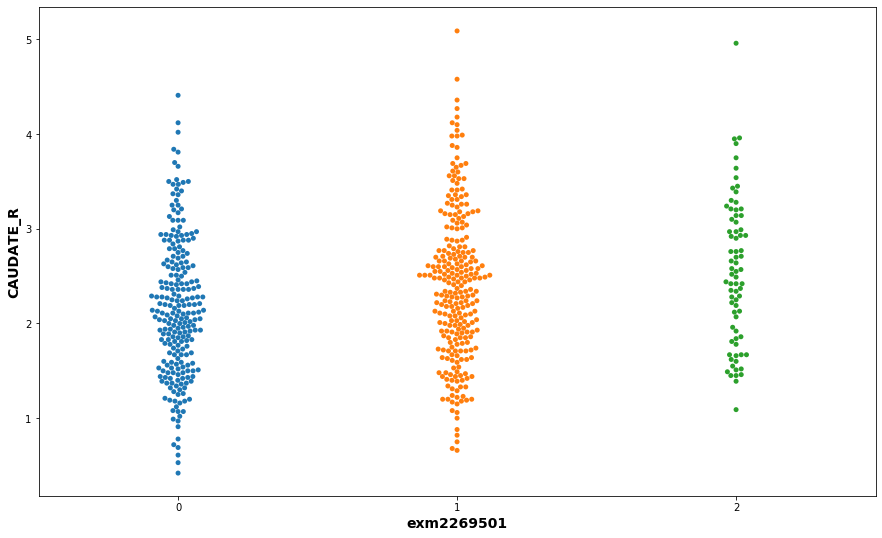

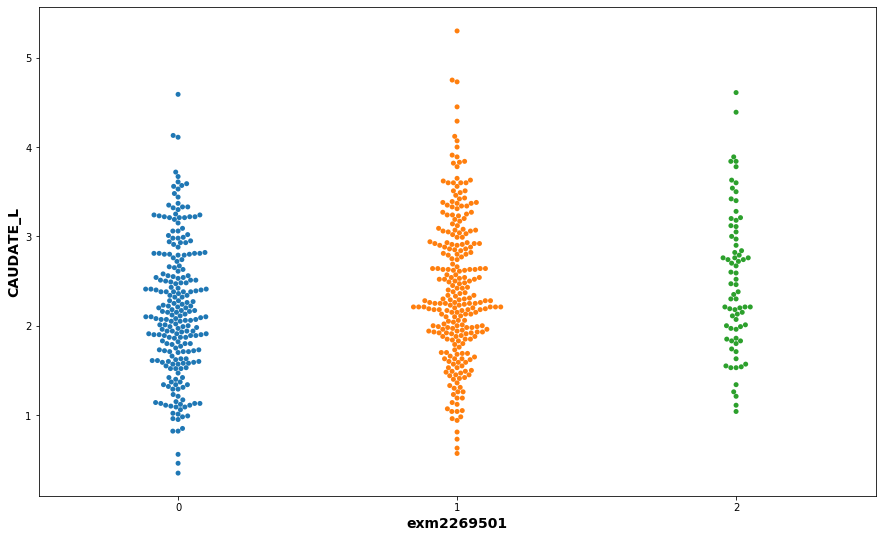

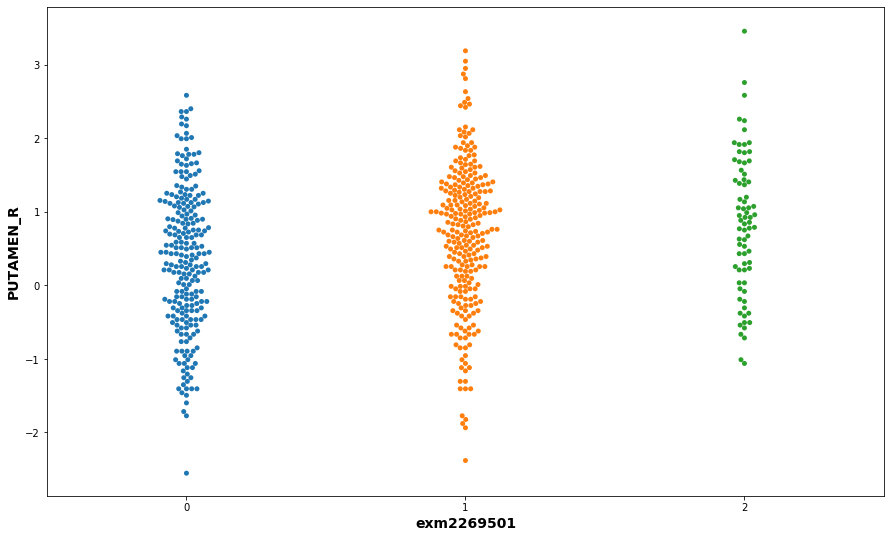

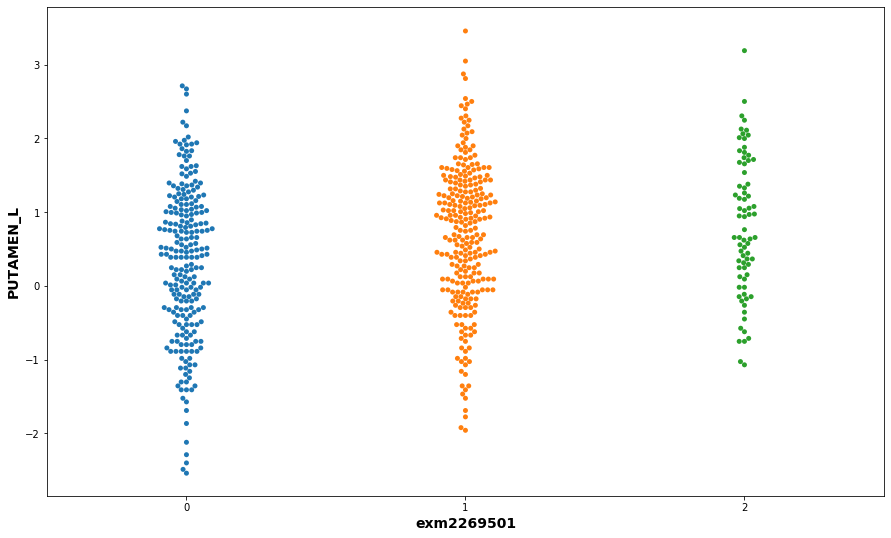

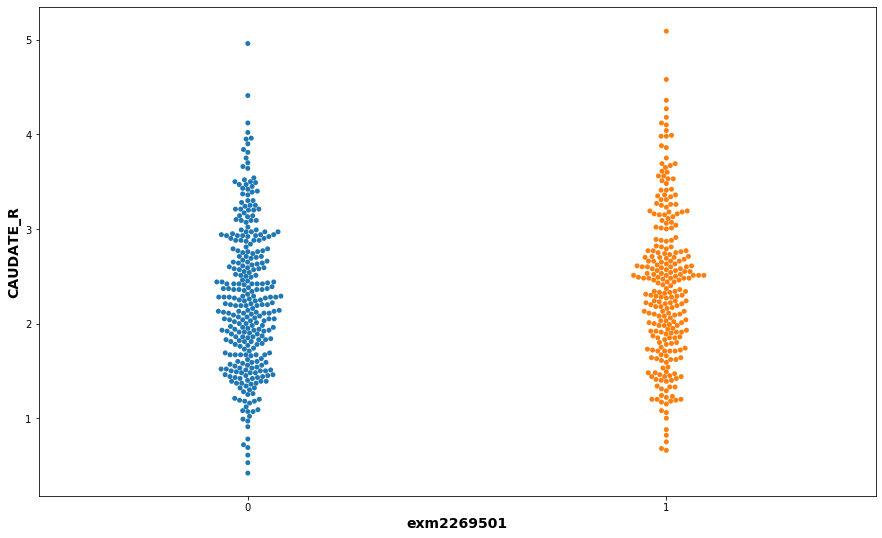

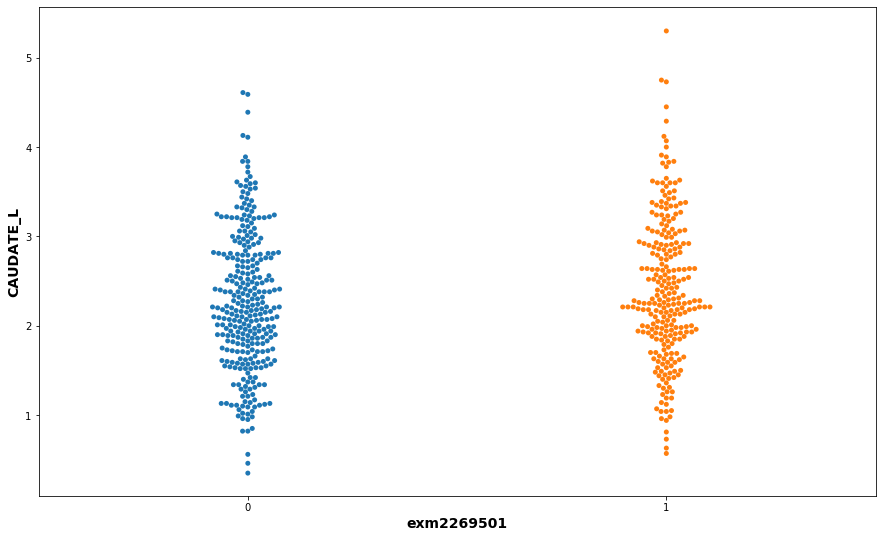

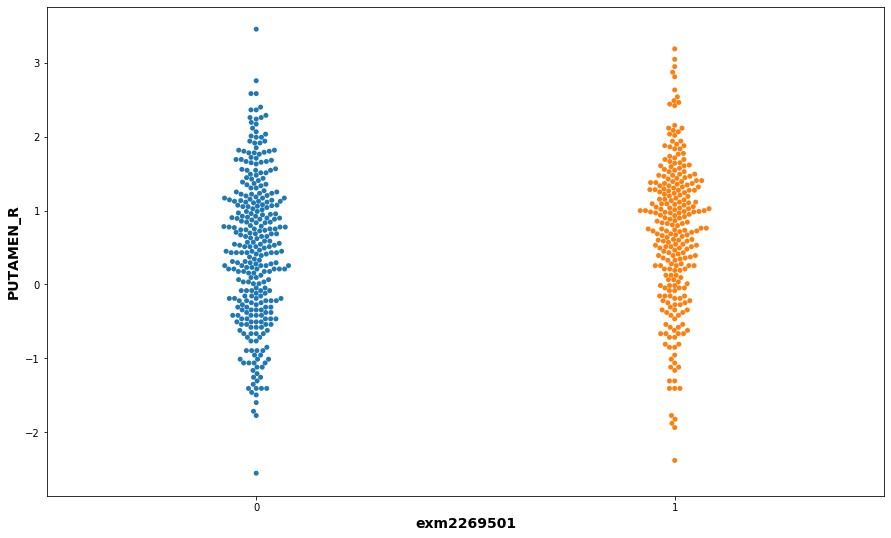

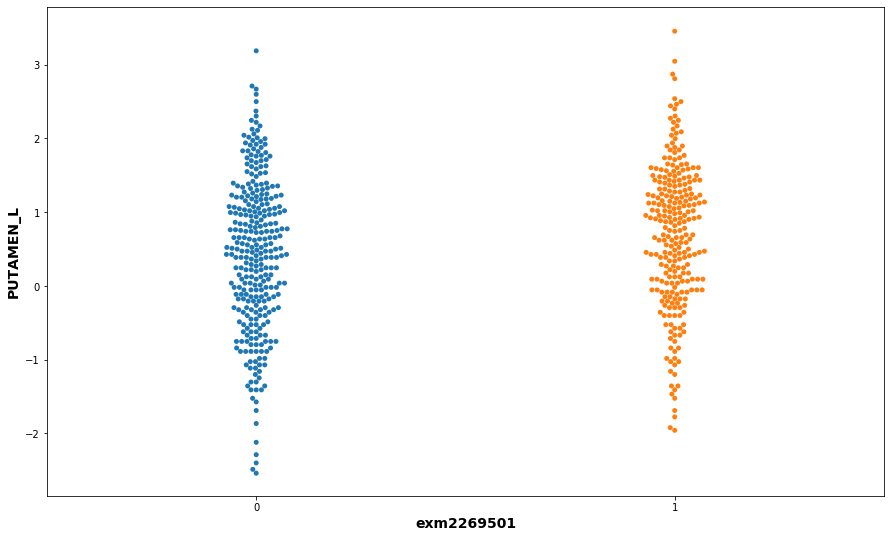

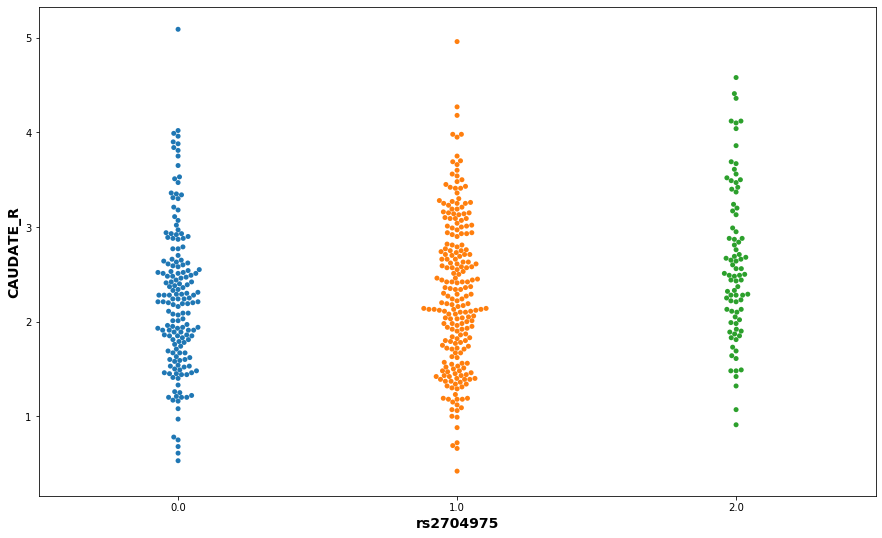

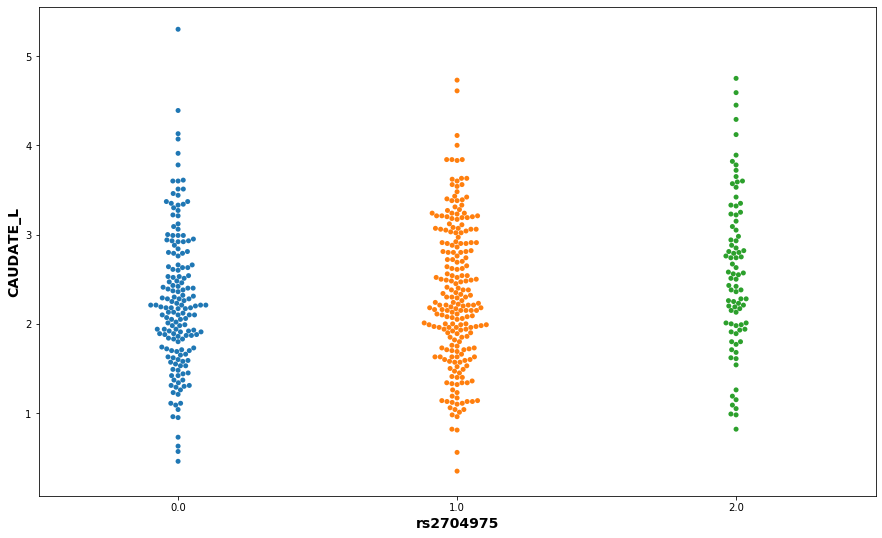

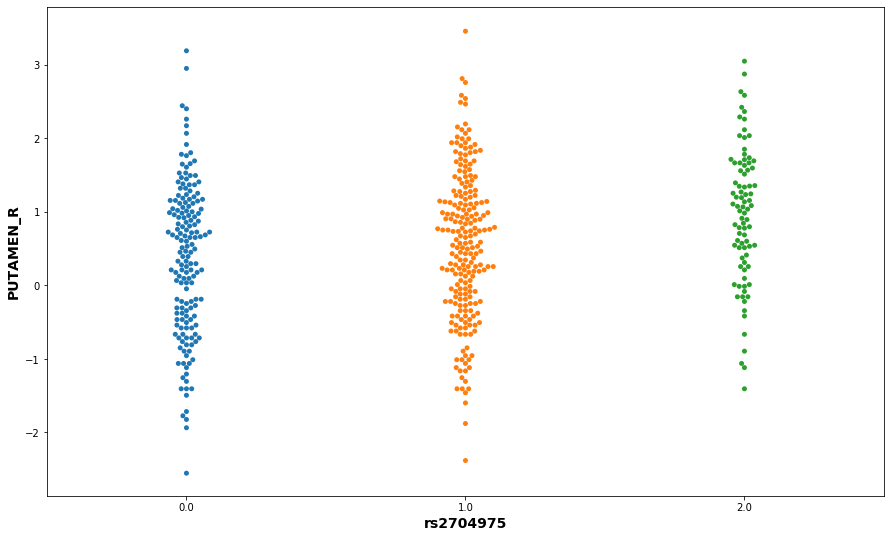

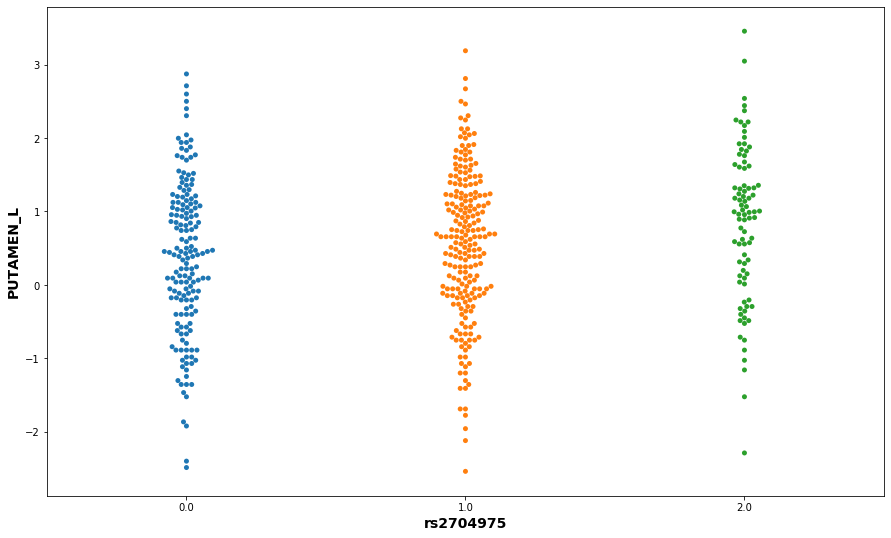

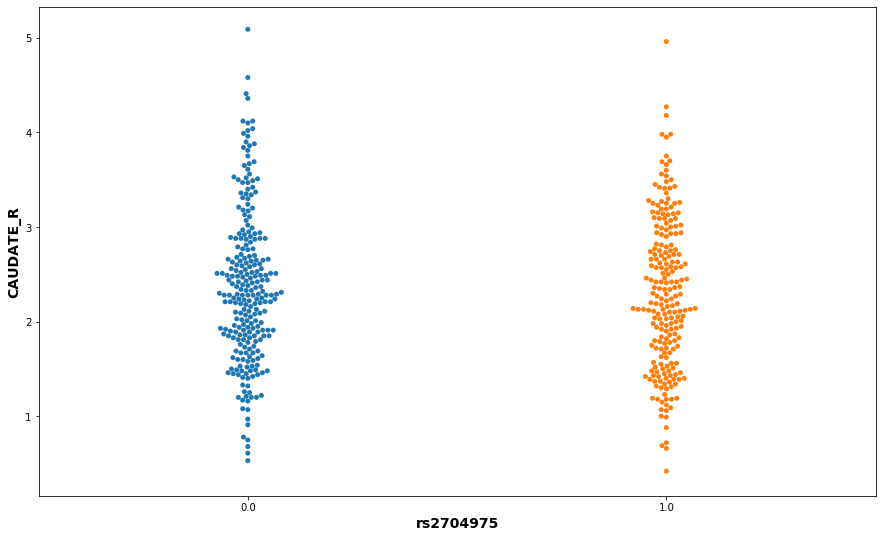

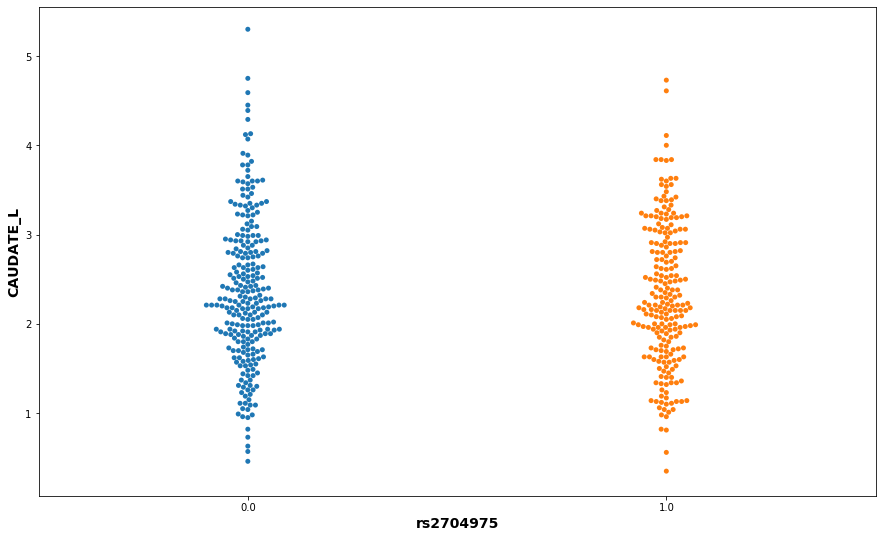

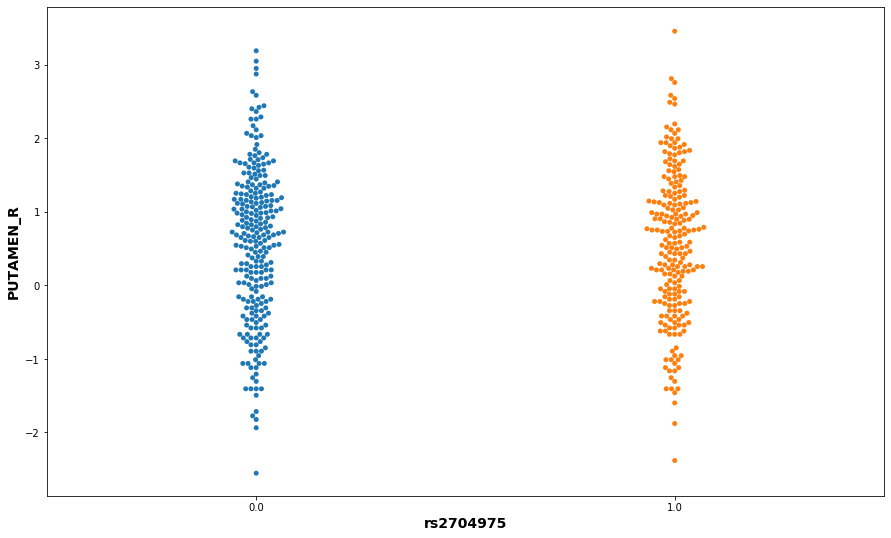

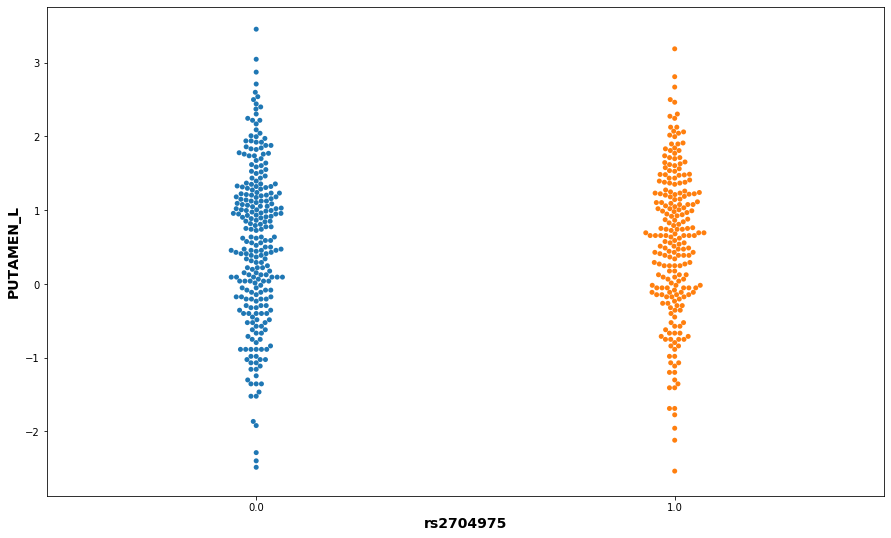

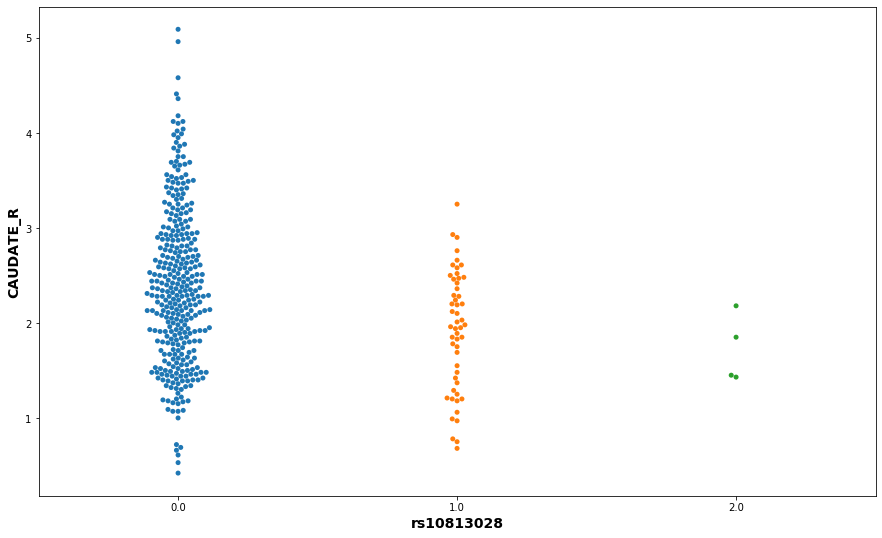

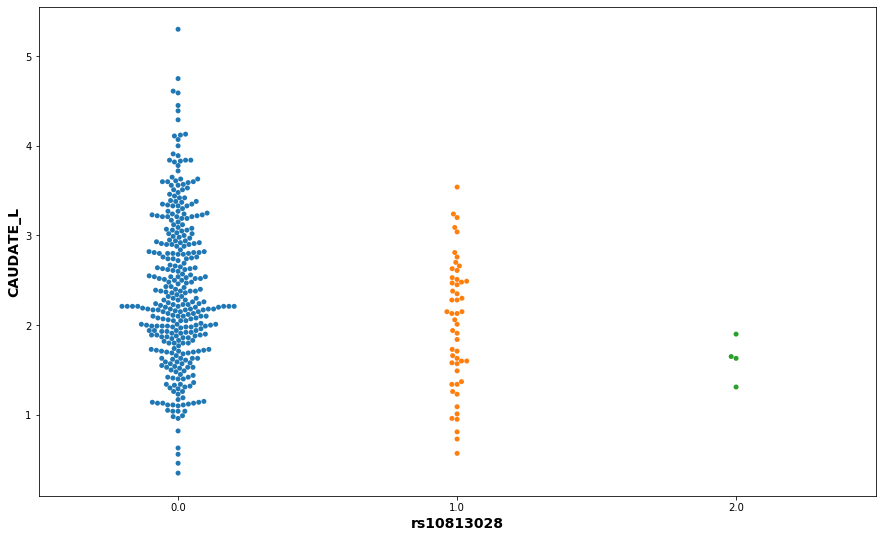

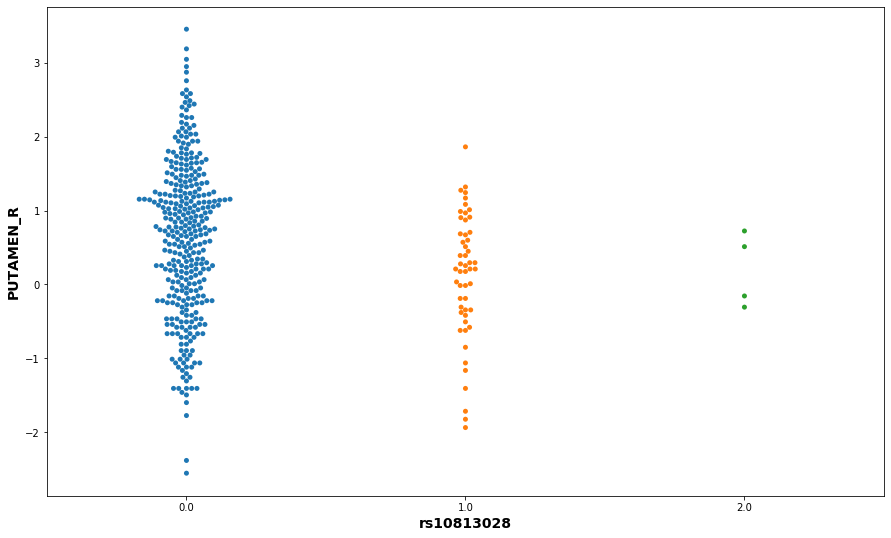

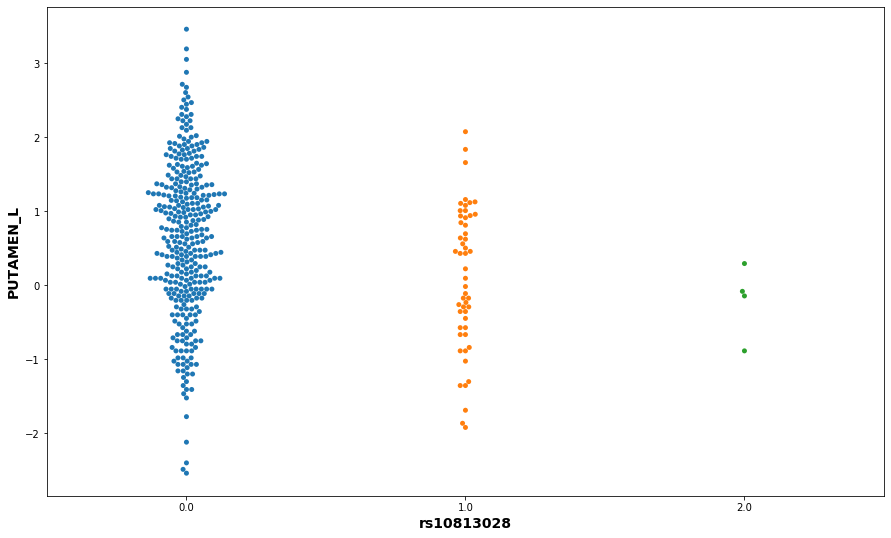

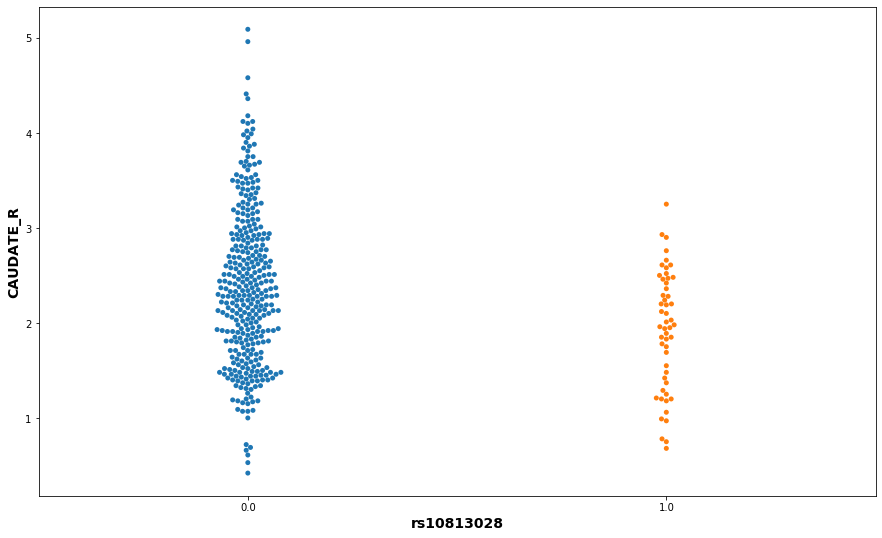

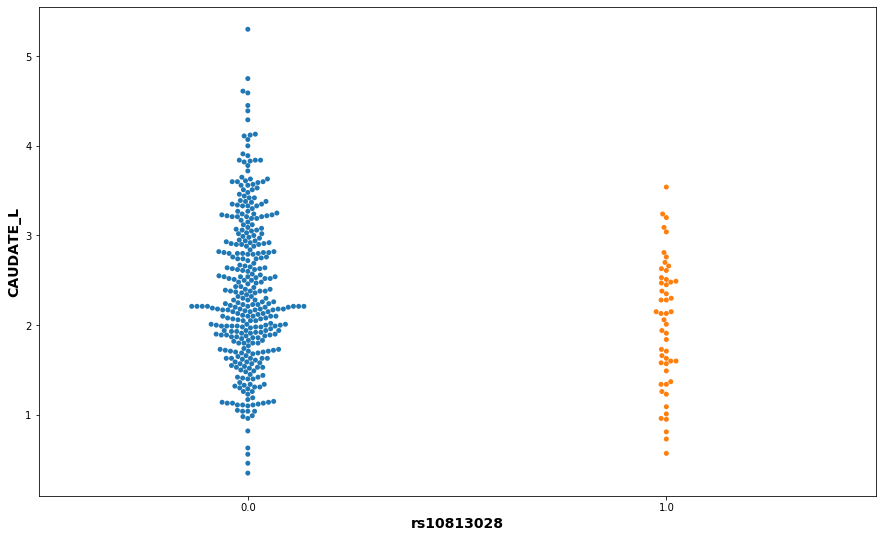

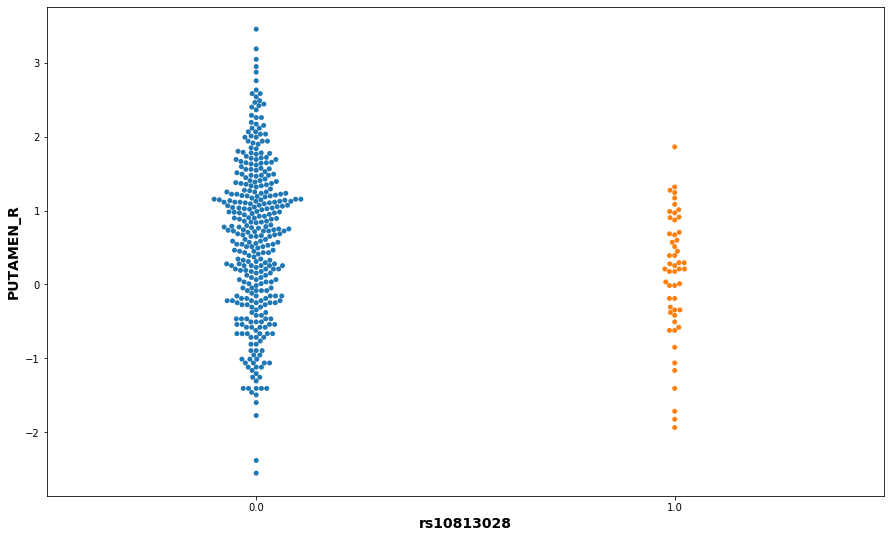

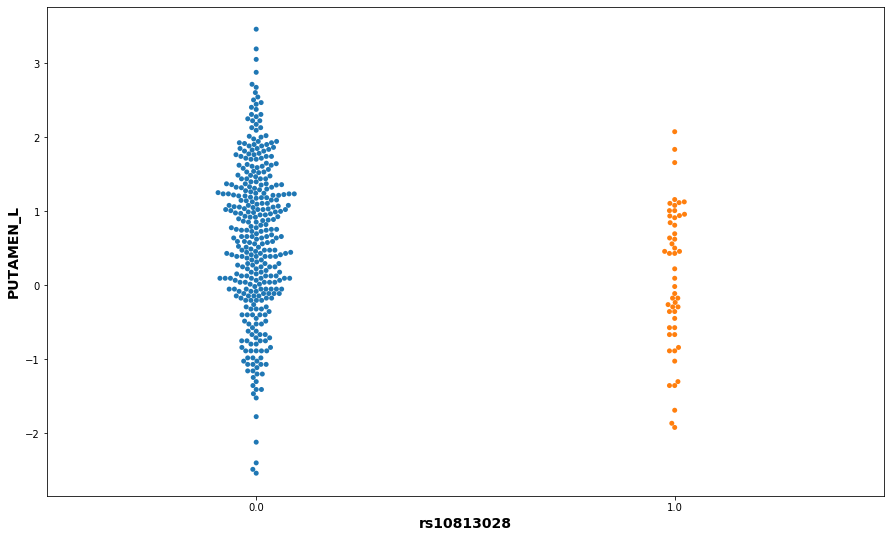

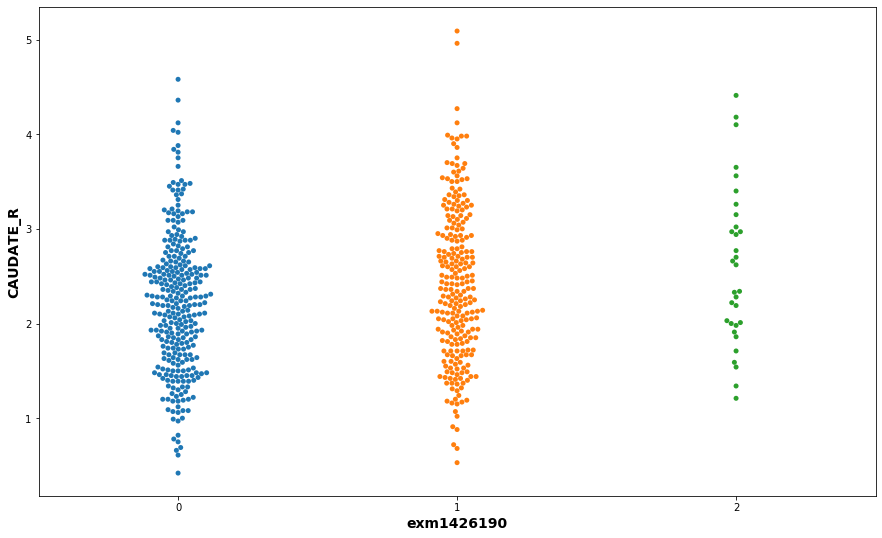

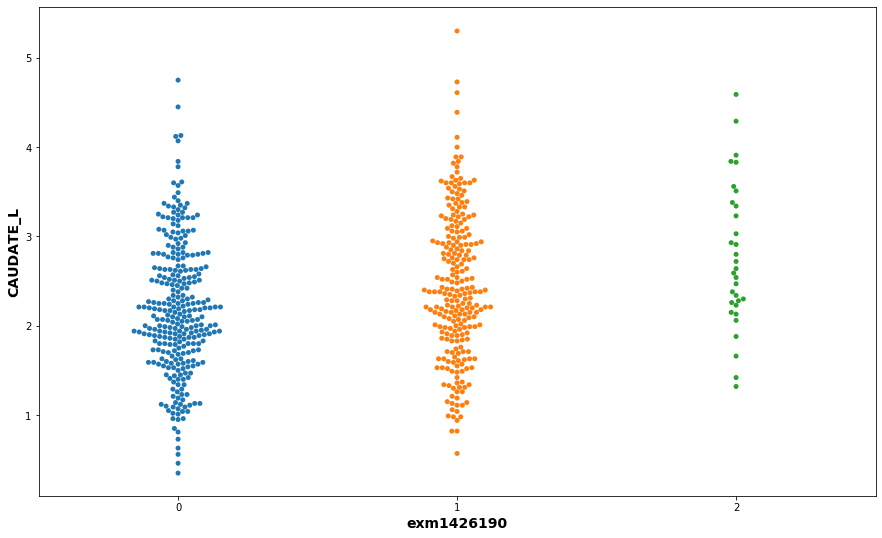

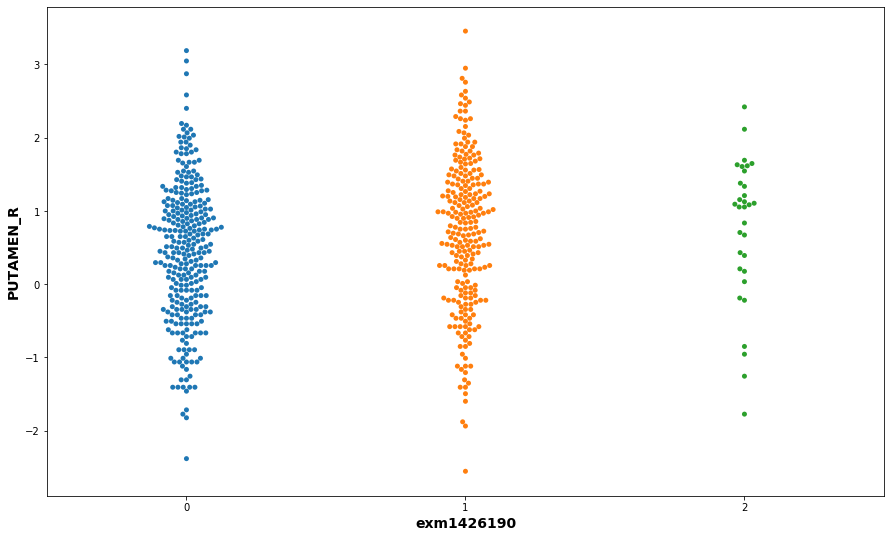

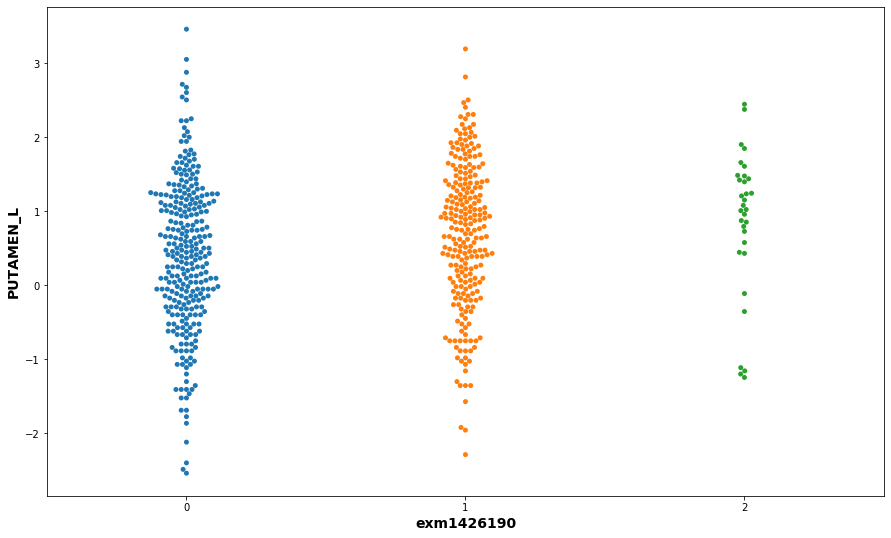

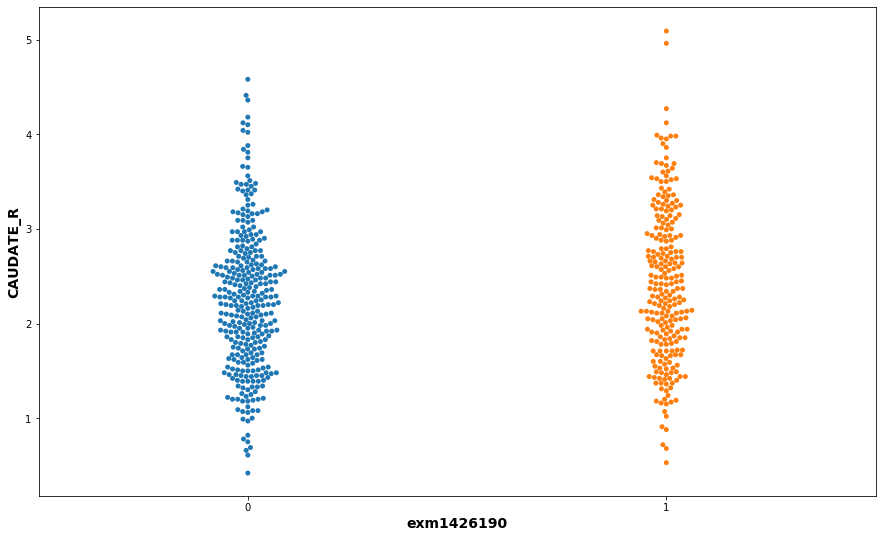

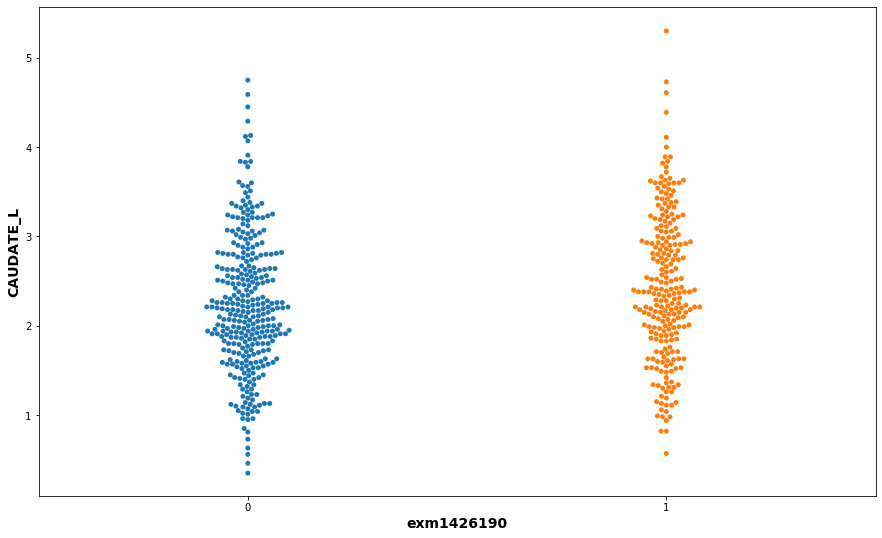

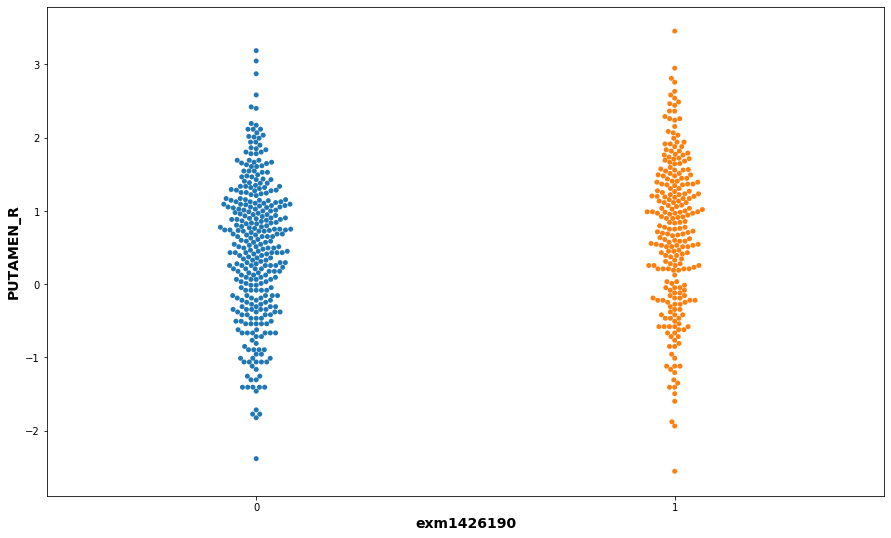

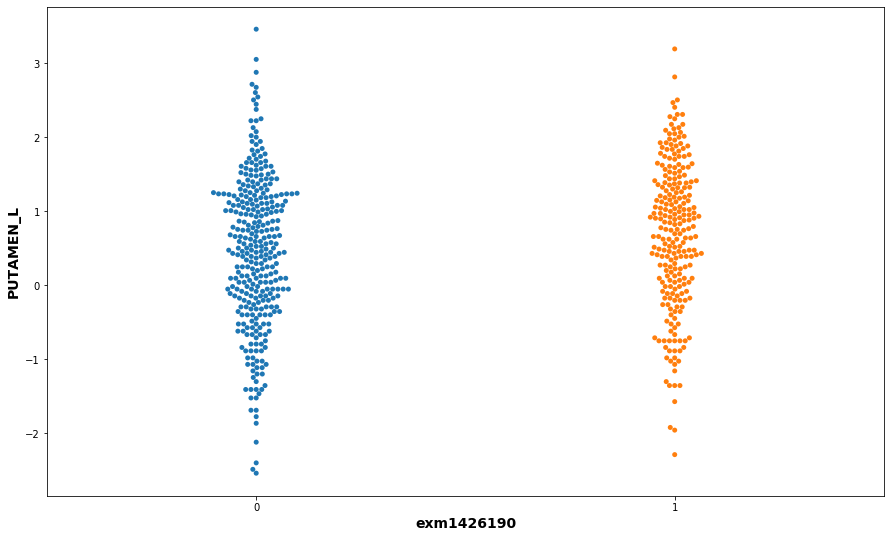

In [88]:
sep = '_'

for i in snps:
    name = i.split(sep, 1)[0]
    for j in phenotype:
        plt.figure(figsize=(15,9))
        sns.swarmplot(x=i, y=j, data=info_dat)
        plt.xlabel(name,fontweight="bold",fontsize=14)
        plt.ylabel(j,fontweight="bold",fontsize=14)
        plt.savefig("Data/CHR_Filtered/Beeswarm plot/DATSCAN/"+name+"_"+j+".png", bbox_inches='tight', dpi=600)

# Computing the Beeswarm plot using the MRI

In [93]:
MRISNPs = ["imm_6_35197582","exm1100639","exm365469","rs628560","rs9565578","rs1361812","rs6533712","exm1349438"]

with open('Data/CHR_Filtered/MRISNPs.txt', 'w') as f:
    for item in MRISNPs:
        f.write("%s\n" % item)

In [94]:
!plink --bfile Data/CHR_Filtered/White_qc_filtered --extract Data/CHR_Filtered/MRISNPs.txt --make-bed --out Data/CHR_Filtered/MRI

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/MRI.log.
Options in effect:
  --bfile Data/CHR_Filtered/White_qc_filtered
  --extract Data/CHR_Filtered/MRISNPs.txt
  --make-bed
  --out Data/CHR_Filtered/MRI

32768 MB RAM detected; reserving 16384 MB for main workspace.
147097 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
--extract: 7 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.897779.
7 variants and 566 people pass filters and QC.
Note: No phenotypes present.
--make-be

In [95]:
!plink --bfile Data/CHR_Filtered/MRI --recode --tab --out Data/CHR_Filtered/PED_MRI

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_MRI.log.
Options in effect:
  --bfile Data/CHR_Filtered/MRI
  --out Data/CHR_Filtered/PED_MRI
  --recode
  --tab

Note: --tab flag deprecated.  Use "--recode tab ...".
32768 MB RAM detected; reserving 16384 MB for main workspace.
7 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52%53%54%55%56%57%58%

In [96]:
!plink --file Data/CHR_Filtered/PED_MRI --recode AD --out Data/CHR_Filtered/PED_MRI_recoded

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Data/CHR_Filtered/PED_MRI_recoded.log.
Options in effect:
  --file Data/CHR_Filtered/PED_MRI
  --out Data/CHR_Filtered/PED_MRI_recoded
  --recode AD

32768 MB RAM detected; reserving 16384 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (7 variants, 566 people).
--file: Data/CHR_Filtered/PED_MRI_recoded-temporary.bed +
Data/CHR_Filtered/PED_MRI_recoded-temporary.bim +
Data/CHR_Filtered/PED_MRI_recoded-temporary.fam written.
7 variants loaded from .bim file.
566 people (377 males, 189 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 566 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%

In [97]:
mri = pd.read_csv("Data/CHR_Filtered/PED_MRI_recoded.raw",sep=" ")
mri

FID   IID  PAT  MAT  SEX  PHENOTYPE  rs1361812_A  rs1361812_HET  \
0    3001  3001    0    0    1         -9          0.0            0.0   
1    3002  3002    0    0    2         -9          1.0            1.0   
2    3004  3004    0    0    1         -9          NaN            NaN   
3    3006  3006    0    0    2         -9          1.0            1.0   
4    3008  3008    0    0    2         -9          1.0            1.0   
..    ...   ...  ...  ...  ...        ...          ...            ...   
561  4125  4125    0    0    1         -9          1.0            1.0   
562  4126  4126    0    0    1         -9          2.0            0.0   
563  4127  4127    0    0    1         -9          NaN            NaN   
564  4136  4136    0    0    1         -9          0.0            0.0   
565  4139  4139    0    0    1         -9          0.0            0.0   

     exm365469_C  exm365469_HET  rs6533712_T  rs6533712_HET  rs628560_C  \
0              1              1          0.0            0.0         1.0   
1              1              1          0.0            0.0         0.0   
2              0              0          0.0            0.0         1.0   
3              0              0          1.0            1.0         0.0   
4              0              0          1.0            1.0         0.0   
..           ...            ...          ...            ...         ...   
561            1              1          1.0            1.0         0.0   
562            0              0          2.0            0.0         1.0   
563            0              0          NaN            NaN         NaN   
564            0              0          0.0            0.0         0.0   
565            0              0          0.0            0.0         0.0   

     rs628560_HET  imm_6_35197582_C  imm_6_35197582_HET  exm1100639_T  \
0             1.0               0.0                 0.0             0   
1             0.0               0.0                 0.0             0   
2             1.0               2.0                 0.0             0   
3             0.0               1.0                 1.0             0   
4             0.0               0.0                 0.0             0   
..            ...               ...                 ...           ...   
561           0.0               0.0                 0.0             0   
562           1.0               0.0                 0.0             0   
563           NaN               NaN                 NaN             1   
564           0.0               0.0                 0.0             0   
565           0.0               1.0                 1.0             1   

     exm1100639_HET  exm1349438_A  exm1349438_HET  
0                 0           1.0             1.0  
1                 0           0.0             0.0  
2                 0           1.0             1.0  
3                 0           2.0             0.0  
4                 0           0.0             0.0  
..              ...           ...             ...  
561               0           1.0             1.0  
562               0           1.0             1.0  
563               1           0.0             0.0  
564               0           1.0             1.0  
565               1           0.0             0.0  

[566 rows x 20 columns]

In [98]:
MRI = pd.read_csv("../Processed_Images/PPMIMERGE_20200419.csv")
MRI = MRI.groupby('PATNO').first().reset_index()
MRI

/Users/guglielmo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,494,496,506,508,510,512,542,543,550,551,553,561,563,564) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


PATNO  index  APPRDX_enrol  APPRDX_current EVENT_ID     Age  Years_bl  \
0      3000    651           2.0             2.0       BL  69.169       0.0   
1      3001    687           1.0             1.0       BL  65.161       NaN   
2      3002    759           1.0             1.0       BL  67.581       NaN   
3      3003    831           1.0             1.0       BL  56.750       0.0   
4      3004    867           2.0             2.0       BL  59.414       0.0   
...     ...    ...           ...             ...      ...     ...       ...   
1906  90456  69726           4.0             4.0       BL  82.505       0.0   
1907  91097  69762           4.0             4.0       BL  67.335       0.0   
1908  91837  69798           4.0             4.0       BL  73.914       0.0   
1909  92490  69834           4.0             4.0       BL  72.504       0.0   
1910  92834  69870           4.0             4.0       BL  66.168       0.0   

      GENDER  FAMHXPD_N1stDegree  FAMHXPD_N2ndDegree  ...   TotalGrayVol  \
0        1.0                 0.0                 0.0  ...  628301.286475   
1        2.0                 0.0                 0.0  ...  668025.901257   
2        1.0                 0.0                 0.0  ...  585538.400359   
3        1.0                 0.0                 0.0  ...  636432.509323   
4        2.0                 0.0                 0.0  ...  640446.950904   
...      ...                 ...                 ...  ...            ...   
1906     2.0                 0.0                 0.0  ...  635113.067329   
1907     2.0                 0.0                 0.0  ...  507261.673333   
1908     2.0                 0.0                 0.0  ...            NaN   
1909     2.0                 0.0                 0.0  ...            NaN   
1910     2.0                 0.0                 0.0  ...  619843.427029   

     SupraTentorialVol  SupraTentorialVolNotVent  SupraTentorialVolNotVentVox  \
0         9.996803e+05              9.777723e+05                     973296.0   
1         1.138365e+06              1.094811e+06                    1092459.0   
2         9.026203e+05              8.838913e+05                     881444.0   
3         1.040302e+06              1.020943e+06                    1019030.0   
4         1.074093e+06              1.056334e+06                    1053446.0   
...                ...                       ...                          ...   
1906      1.123903e+06              1.030924e+06                    1027319.0   
1907      8.354743e+05              8.187873e+05                     816977.0   
1908               NaN                       NaN                          NaN   
1909               NaN                       NaN                          NaN   
1910      1.001420e+06              9.639952e+05                     962387.0   

      TD_score PIGD_score  TD_PIGD_ratio  TD_PIGD_class     INFODT_  \
0     0.000000        0.0            NaN  Indeterminate  2011-02-01   
1     0.272727        0.0       5.000000             TD  2011-03-01   
2     0.181818        0.6       0.303030           PIGD  2011-03-01   
3     0.363636        0.4       0.909091  Indeterminate  2011-04-01   
4     0.000000        0.0            NaN  Indeterminate  2011-04-01   
...        ...        ...            ...            ...         ...   
1906  0.090909        0.6       0.151515           PIGD  2013-09-01   
1907  0.000000        0.4       0.000000           PIGD  2014-07-01   
1908  0.000000        0.0            NaN  Indeterminate  2014-03-01   
1909  0.090909        0.0       0.000000             TD  2015-01-01   
1910  0.000000        0.0       0.000000  Indeterminate  2015-02-01   

       INFODT_bl  
0     2011-02-01  
1            NaN  
2            NaN  
3     2011-04-01  
4     2011-04-01  
...          ...  
1906  2013-09-01  
1907  2014-07-01  
1908  2014-03-01  
1909  2015-01-01  
1910  2015-02-01  

[1911 rows x 903 columns]

In [99]:
info_mri = mri.merge(MRI, left_on=['FID'], right_on=['PATNO'])
info_mri

FID   IID  PAT  MAT  SEX  PHENOTYPE  rs1361812_A  rs1361812_HET  \
0    3001  3001    0    0    1         -9          0.0            0.0   
1    3002  3002    0    0    2         -9          1.0            1.0   
2    3004  3004    0    0    1         -9          NaN            NaN   
3    3006  3006    0    0    2         -9          1.0            1.0   
4    3008  3008    0    0    2         -9          1.0            1.0   
..    ...   ...  ...  ...  ...        ...          ...            ...   
561  4125  4125    0    0    1         -9          1.0            1.0   
562  4126  4126    0    0    1         -9          2.0            0.0   
563  4127  4127    0    0    1         -9          NaN            NaN   
564  4136  4136    0    0    1         -9          0.0            0.0   
565  4139  4139    0    0    1         -9          0.0            0.0   

     exm365469_C  exm365469_HET  ...   TotalGrayVol  SupraTentorialVol  \
0              1              1  ...  668025.901257       1.138365e+06   
1              1              1  ...  585538.400359       9.026203e+05   
2              0              0  ...  640446.950904       1.074093e+06   
3              0              0  ...  691787.053845       1.120597e+06   
4              0              0  ...  522266.506289       7.901650e+05   
..           ...            ...  ...            ...                ...   
561            1              1  ...            NaN                NaN   
562            0              0  ...  695806.656485       1.145848e+06   
563            0              0  ...  568639.007992       8.759602e+05   
564            0              0  ...  695968.316289       1.078311e+06   
565            0              0  ...  608575.445209       9.160329e+05   

     SupraTentorialVolNotVent  SupraTentorialVolNotVentVox  TD_score  \
0                1.094811e+06                    1092459.0  0.272727   
1                8.838913e+05                     881444.0  0.181818   
2                1.056334e+06                    1053446.0  0.000000   
3                1.091968e+06                    1089715.0  0.090909   
4                7.530110e+05                     749890.0  0.000000   
..                        ...                          ...       ...   
561                       NaN                          NaN  1.000000   
562              1.115972e+06                    1113066.0  0.545455   
563              8.617642e+05                     860686.0  0.636364   
564              1.053845e+06                    1051472.0  0.181818   
565              8.770189e+05                     876096.0  0.000000   

     PIGD_score  TD_PIGD_ratio  TD_PIGD_class     INFODT_   INFODT_bl  
0           0.0       5.000000             TD  2011-03-01         NaN  
1           0.6       0.303030           PIGD  2011-03-01         NaN  
2           0.0            NaN  Indeterminate  2011-04-01  2011-04-01  
3           0.2       0.454545           PIGD  2011-04-01  2011-04-01  
4           0.2       0.000000           PIGD  2011-06-01  2011-06-01  
..          ...            ...            ...         ...         ...  
561         0.0       1.136364             TD  2013-04-01         NaN  
562         0.2       2.727273             TD  2013-03-01         NaN  
563         0.0       2.272727             TD  2013-04-01  2013-04-01  
564         0.6       0.303030           PIGD  2013-03-01  2013-03-01  
565         0.0            NaN  Indeterminate  2013-04-01  2013-04-01  

[566 rows x 923 columns]

In [105]:
snps2 = info_mri.columns[6:20].to_list()
snps2

['rs1361812_A',
 'rs1361812_HET',
 'exm365469_C',
 'exm365469_HET',
 'rs6533712_T',
 'rs6533712_HET',
 'rs628560_C',
 'rs628560_HET',
 'imm_6_35197582_C',
 'imm_6_35197582_HET',
 'exm1100639_T',
 'exm1100639_HET',
 'exm1349438_A',
 'exm1349438_HET']

In [106]:
phenotype2 = ["rh_parahippocampal_area", "lh_parahippocampal_area","rh_parahippocampal_volume","lh_parahippocampal_volume"]
phenotype2

['rh_parahippocampal_area',
 'lh_parahippocampal_area',
 'rh_parahippocampal_volume',
 'lh_parahippocampal_volume']

/Users/guglielmo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


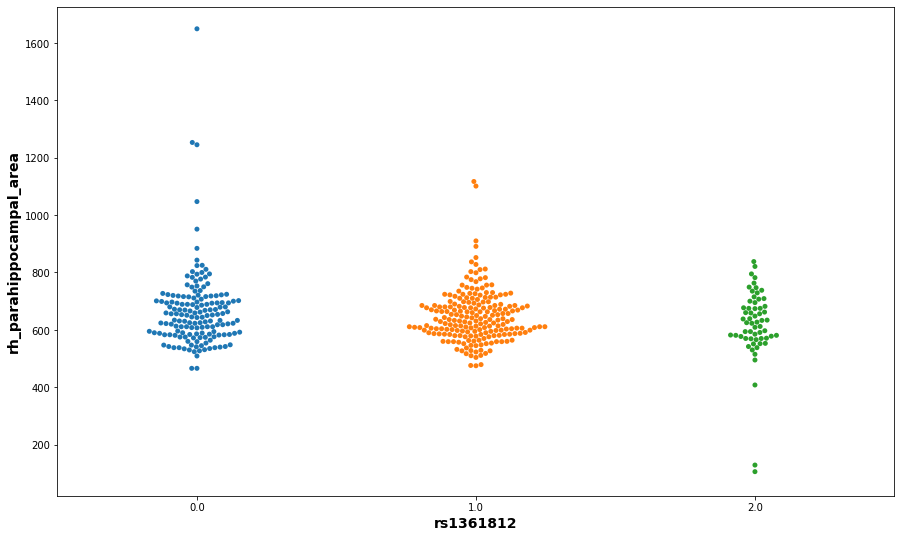

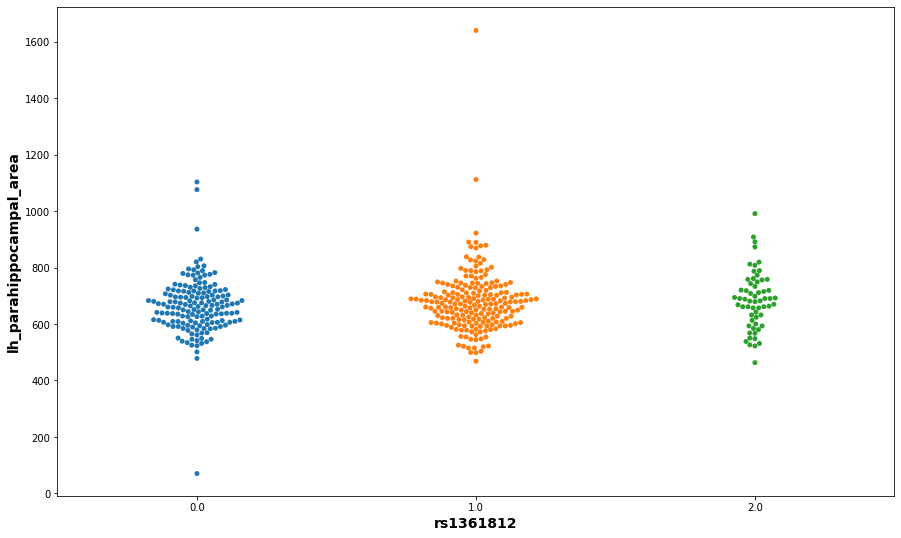

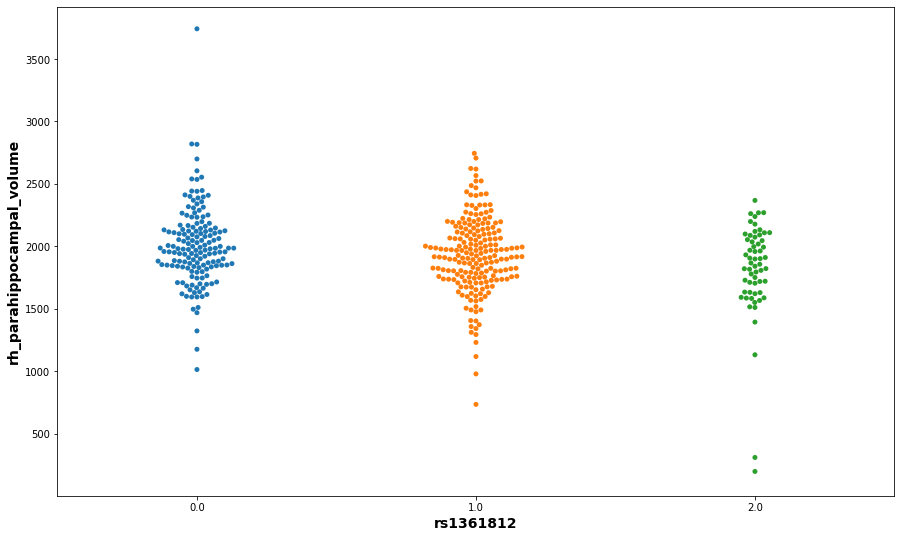

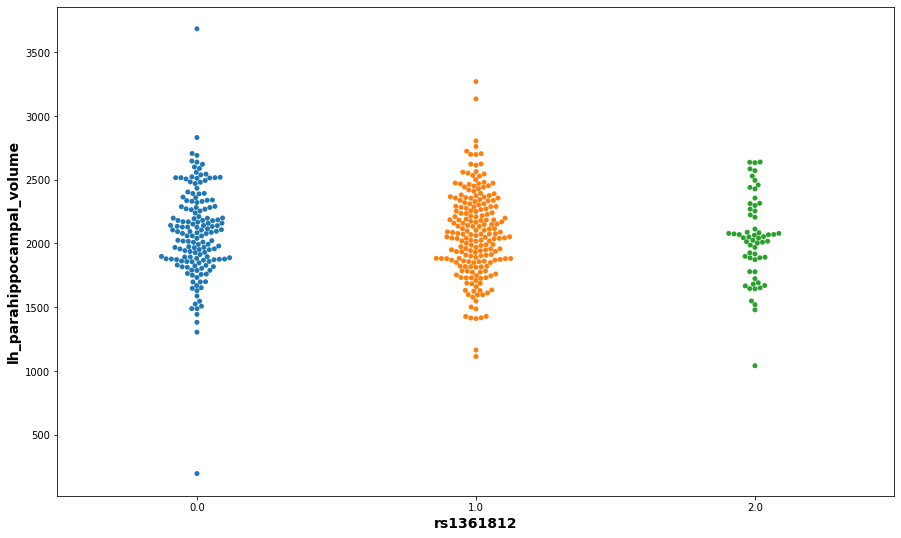

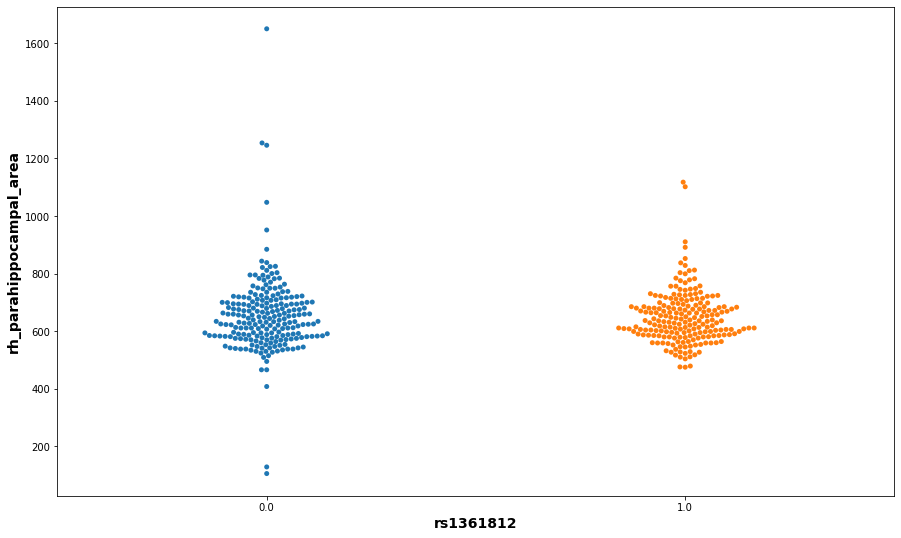

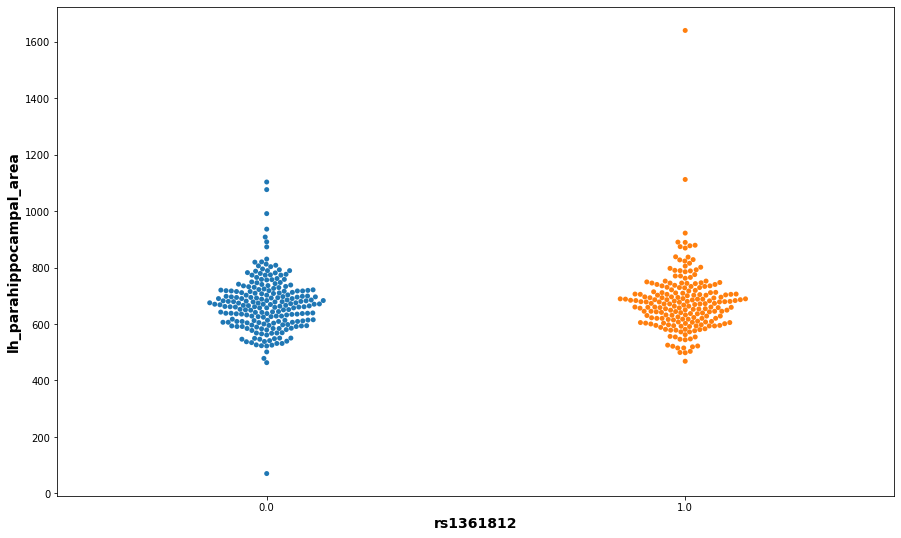

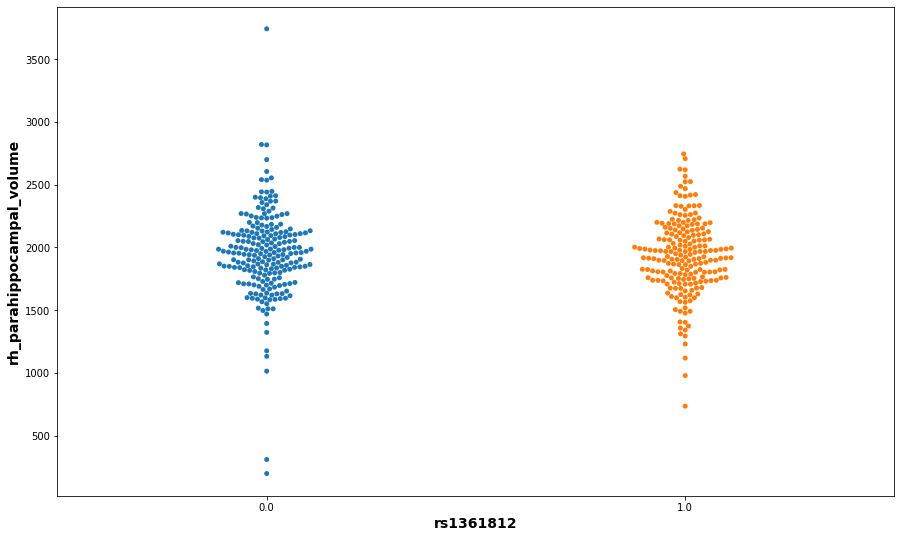

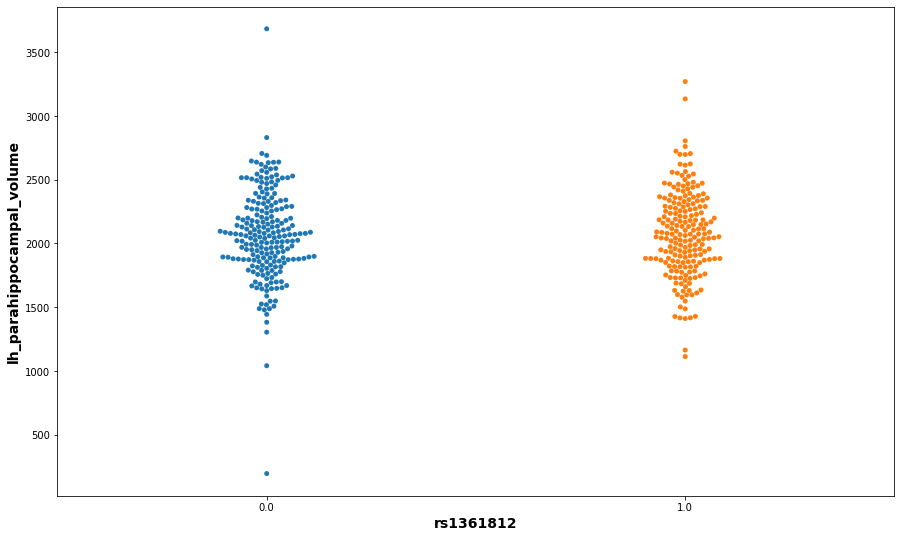

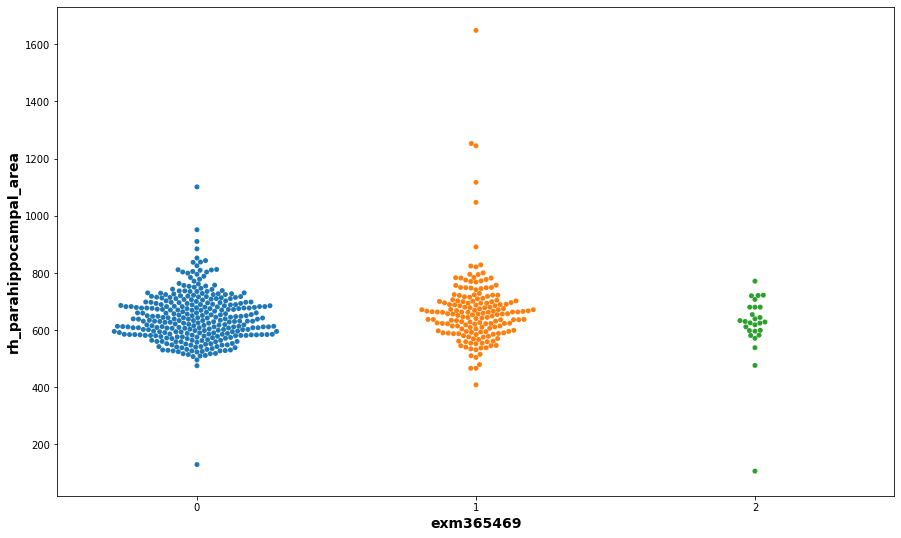

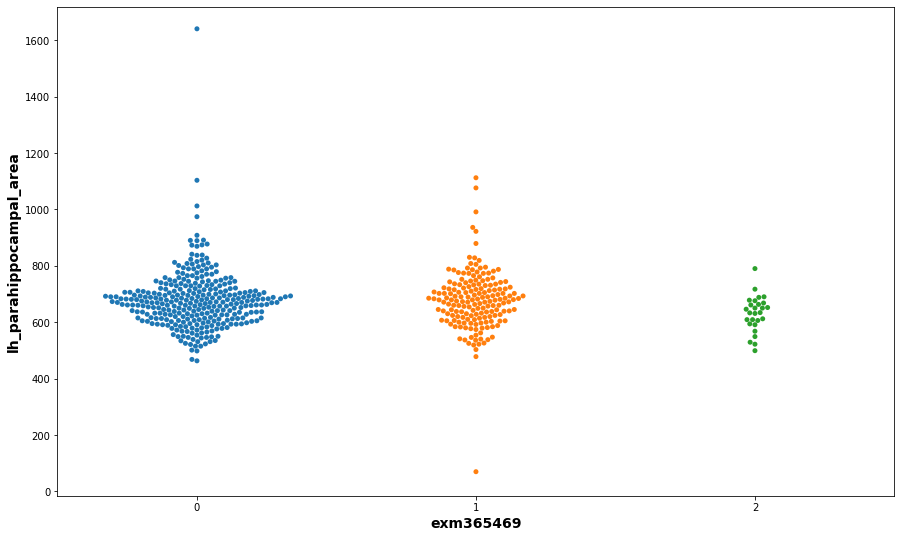

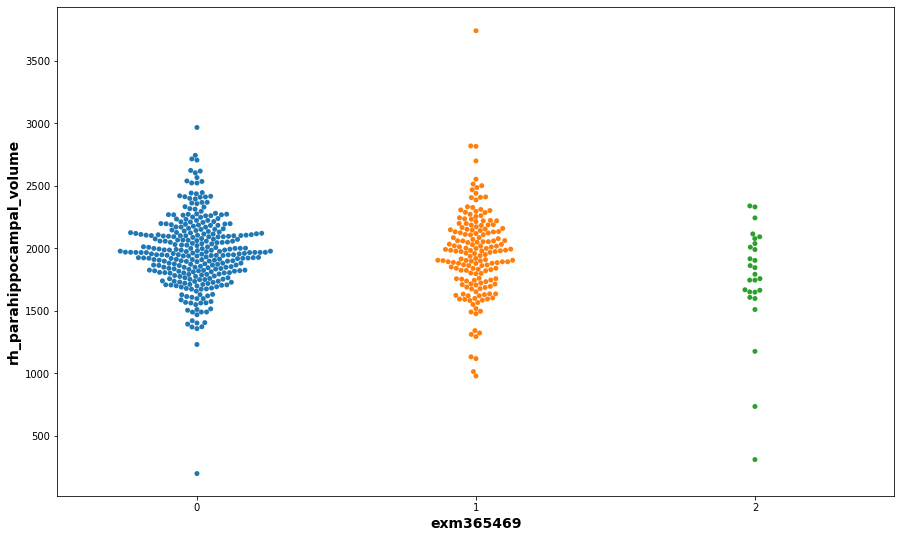

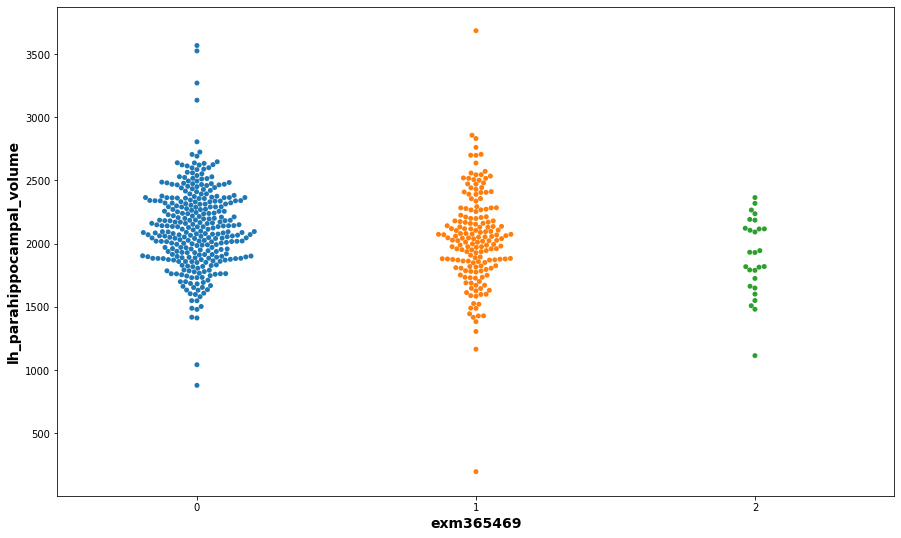

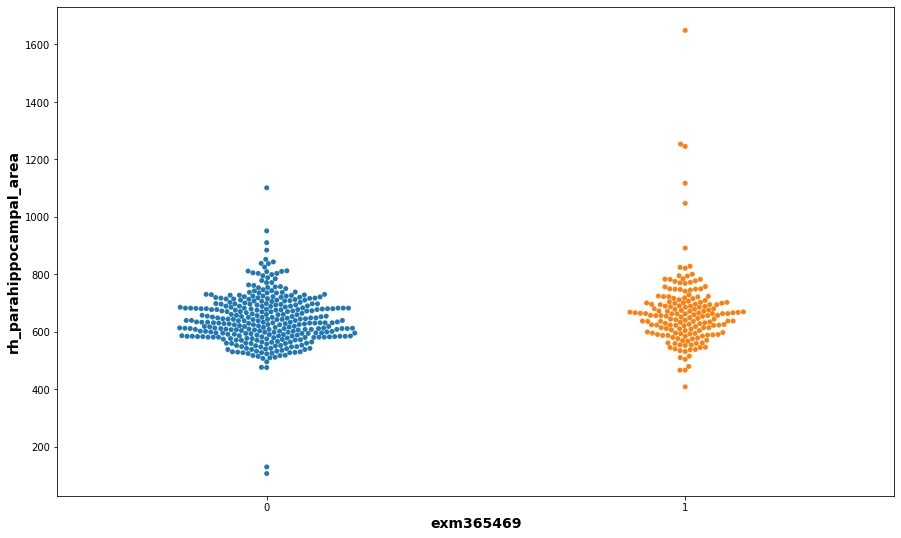

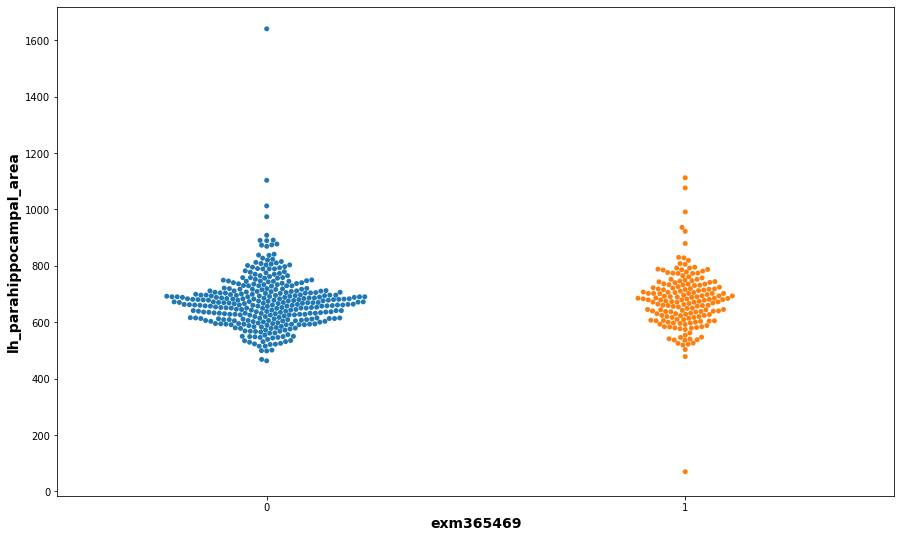

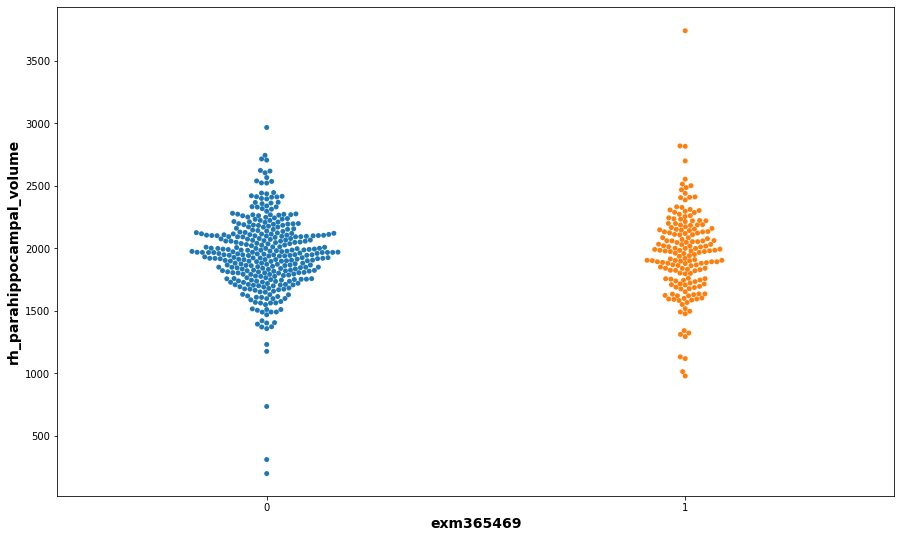

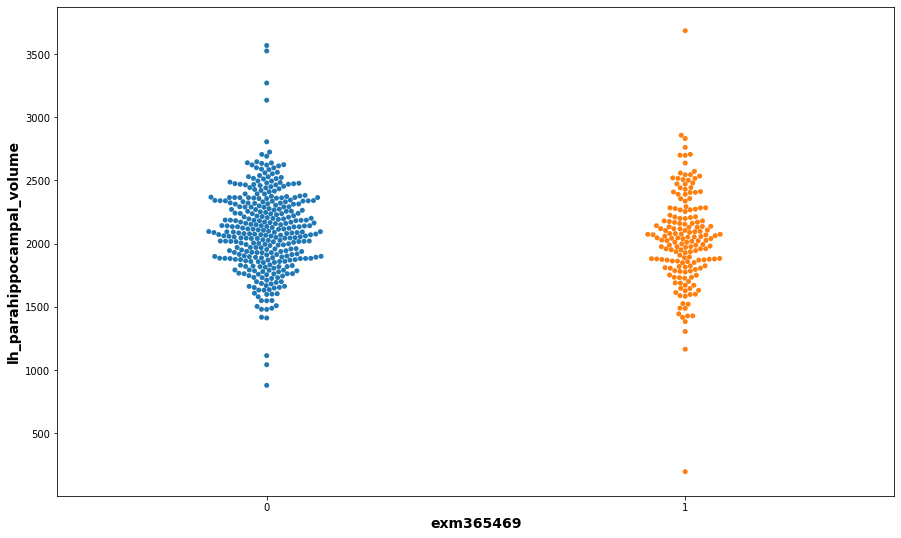

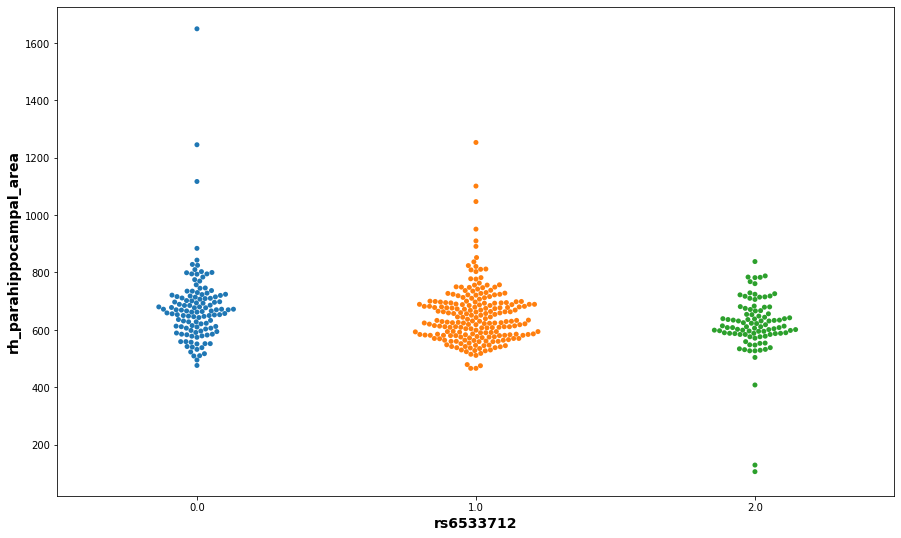

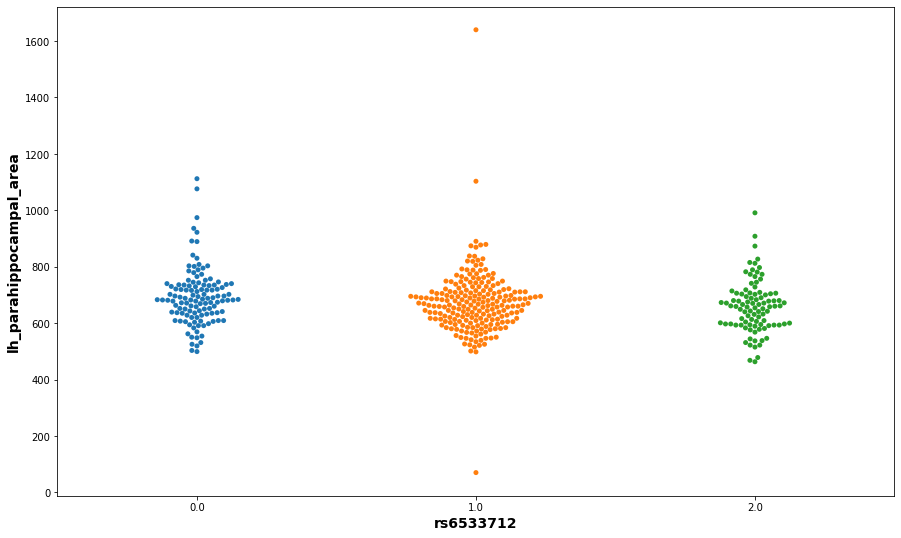

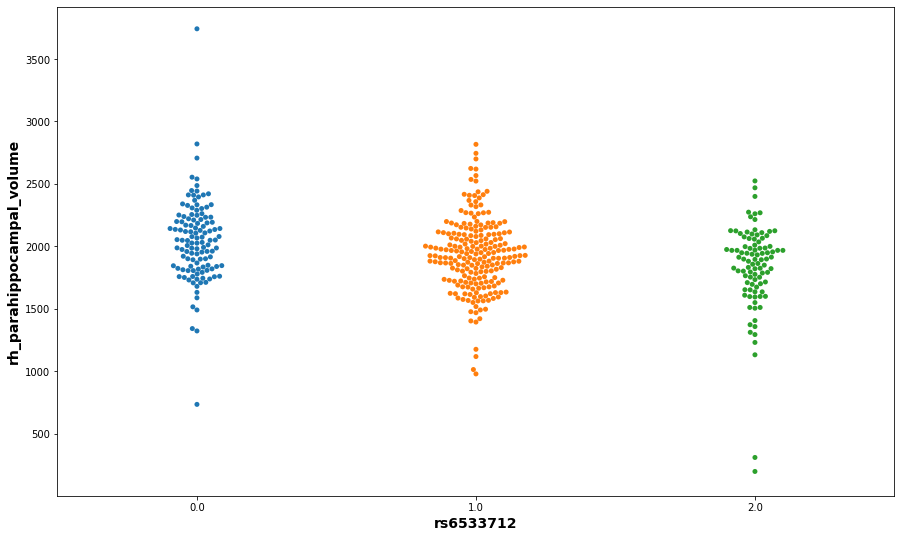

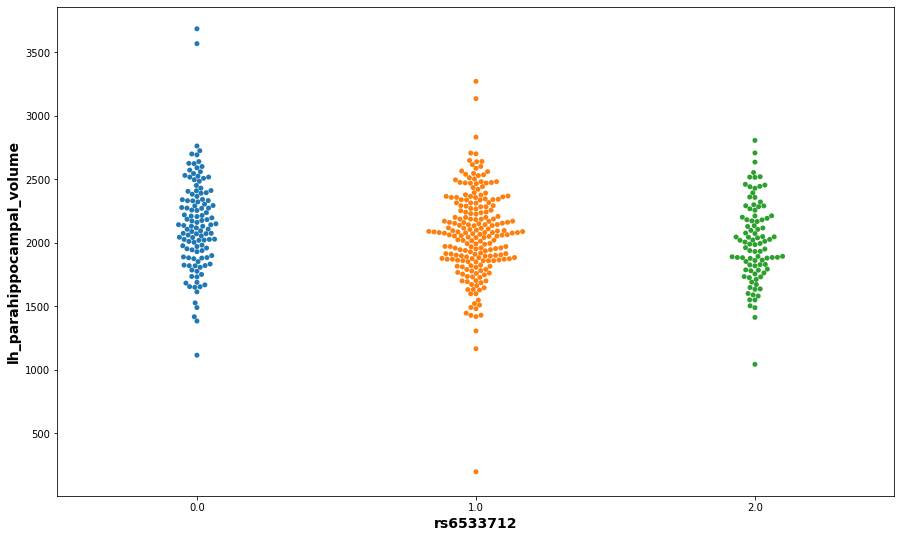

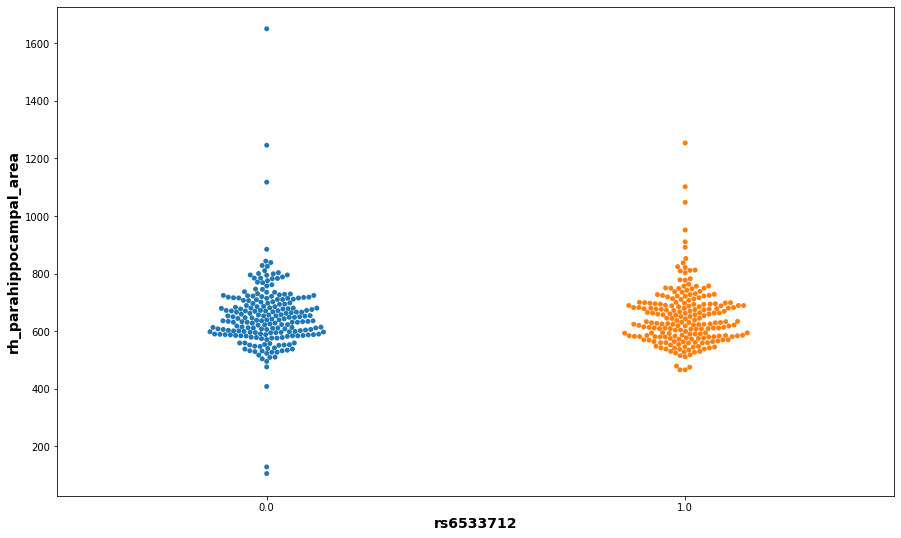

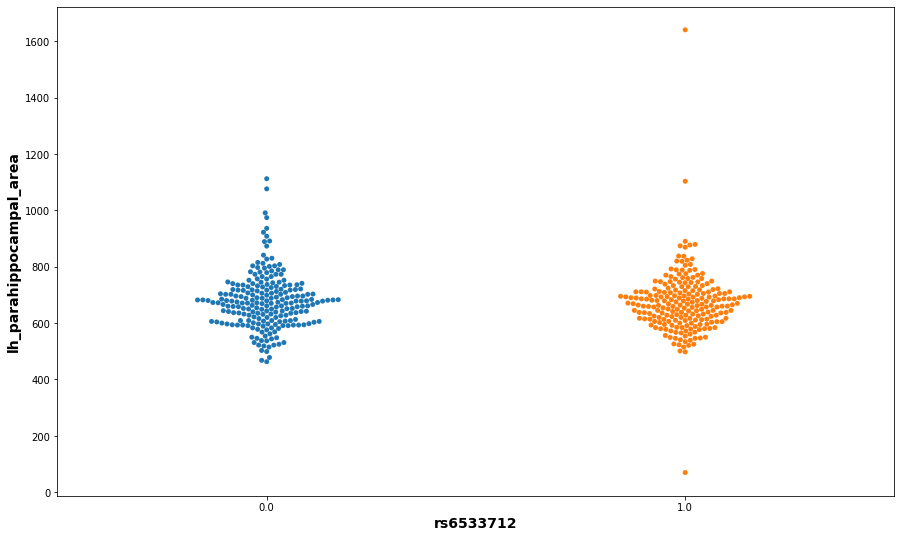

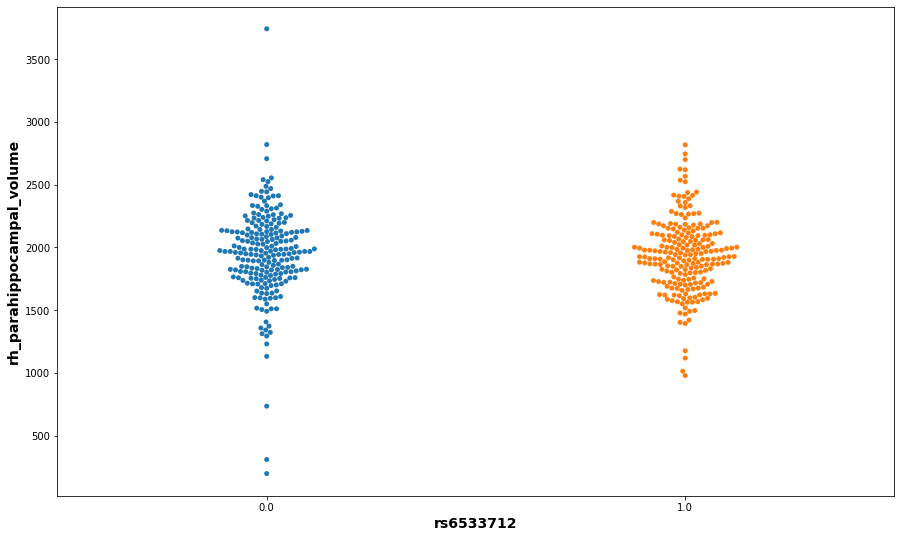

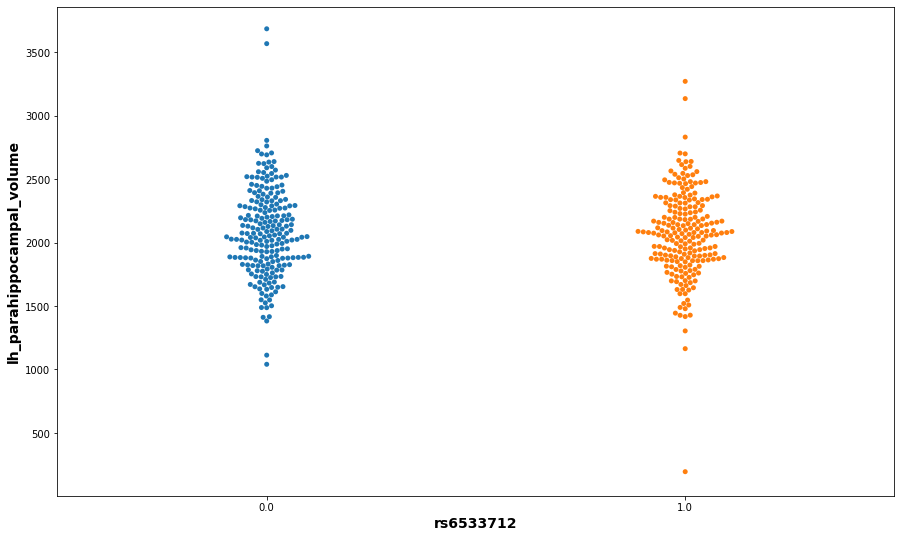

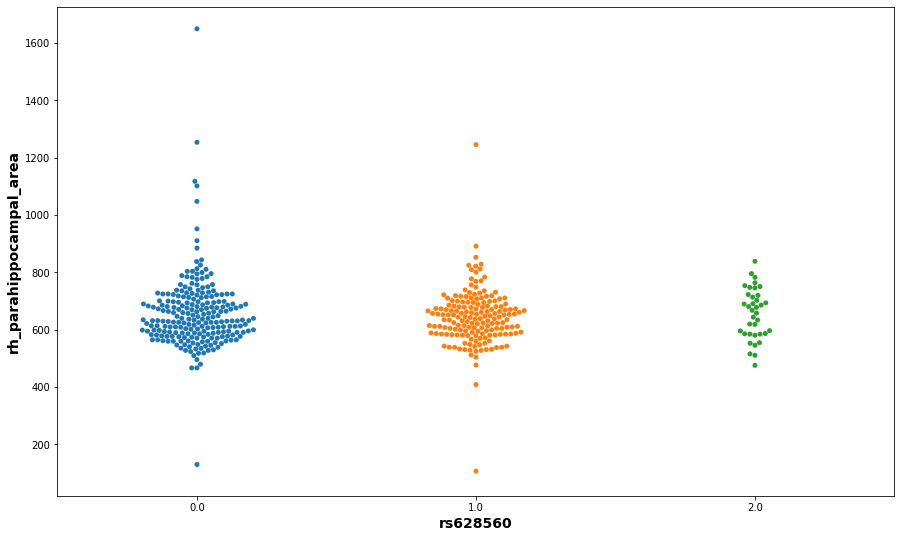

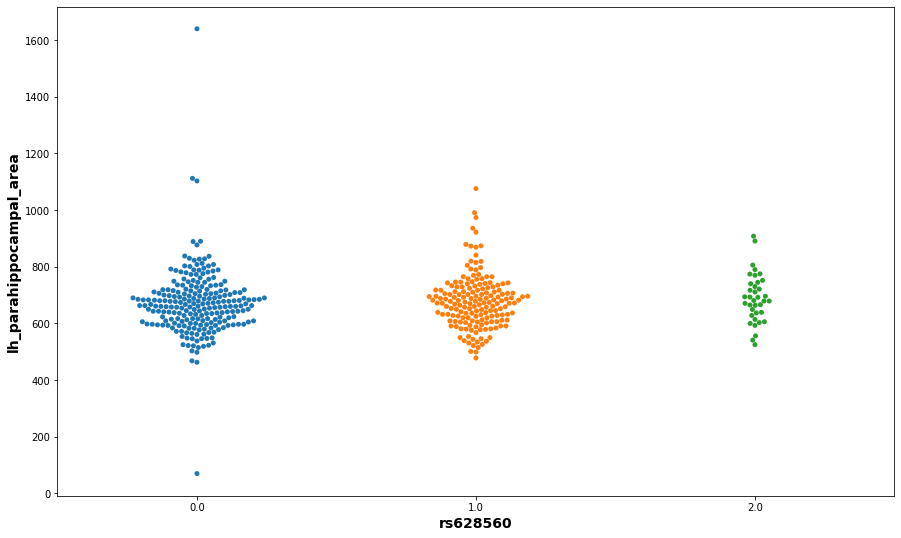

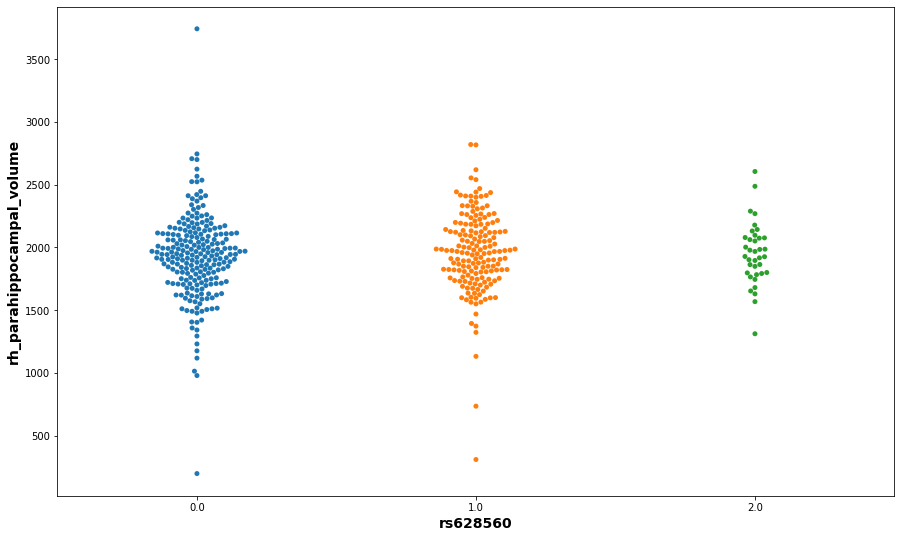

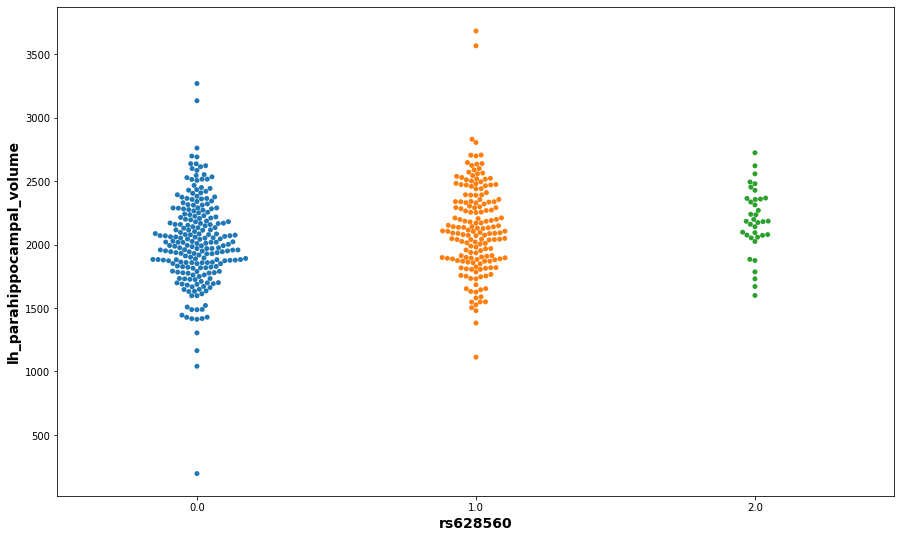

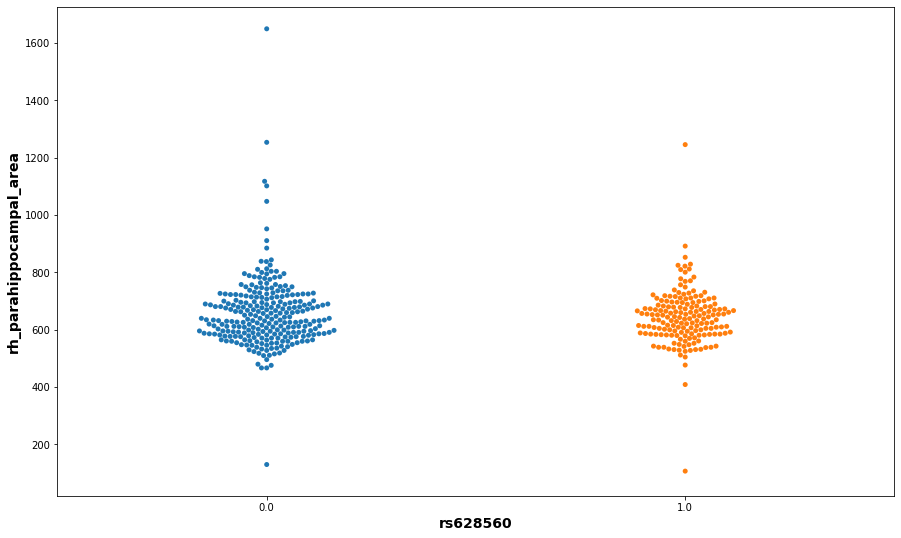

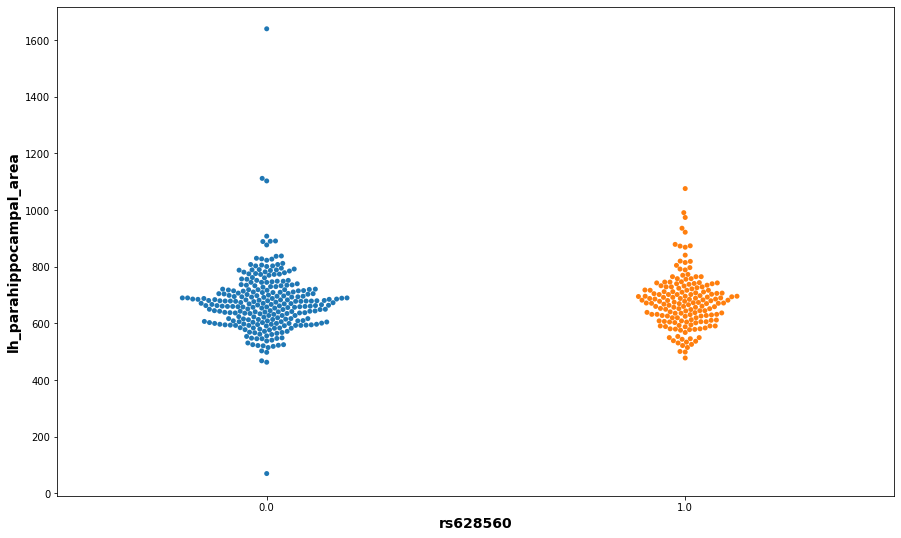

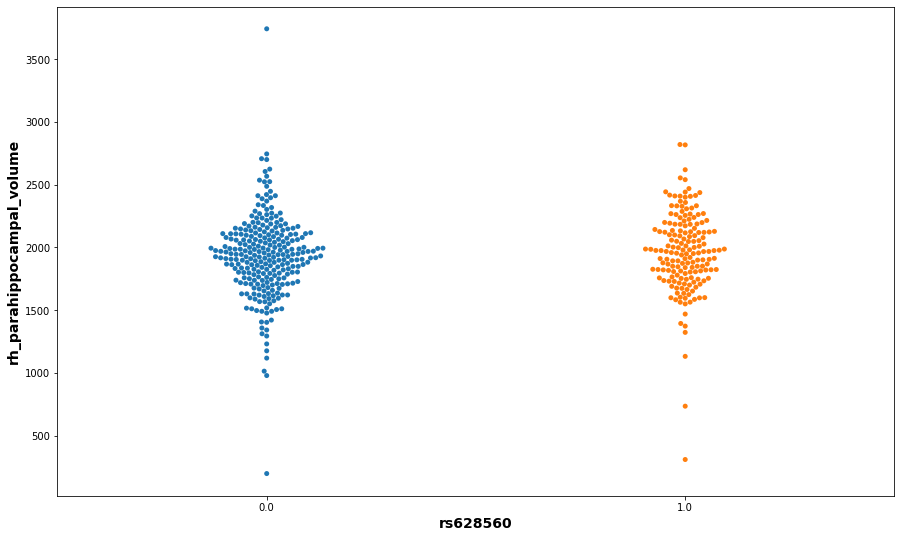

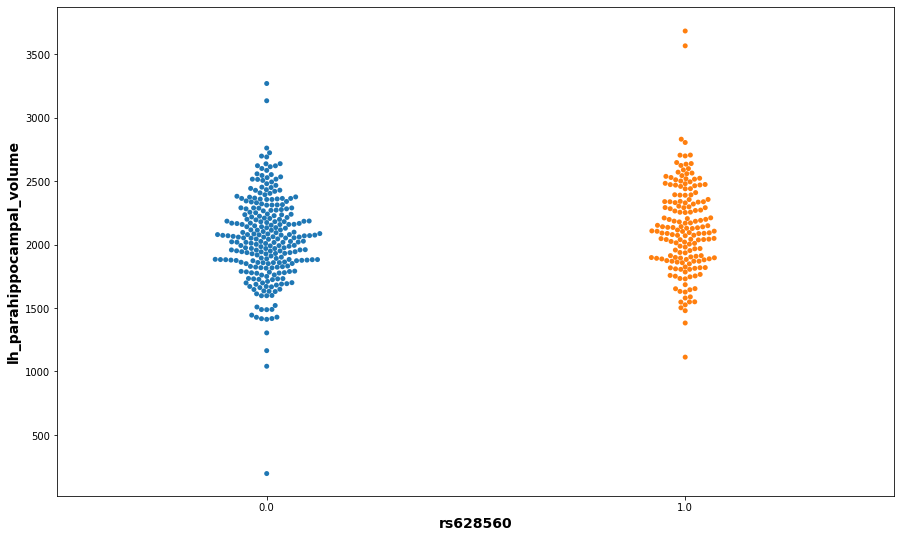

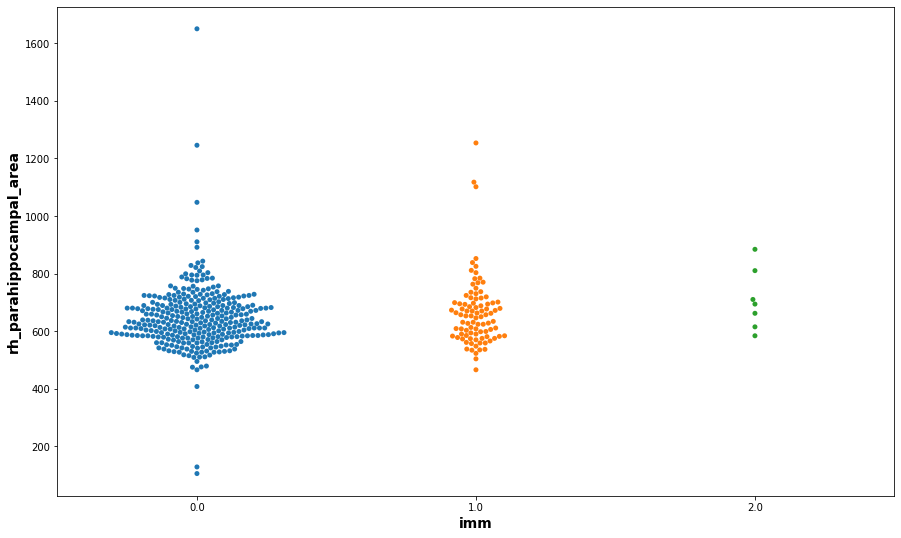

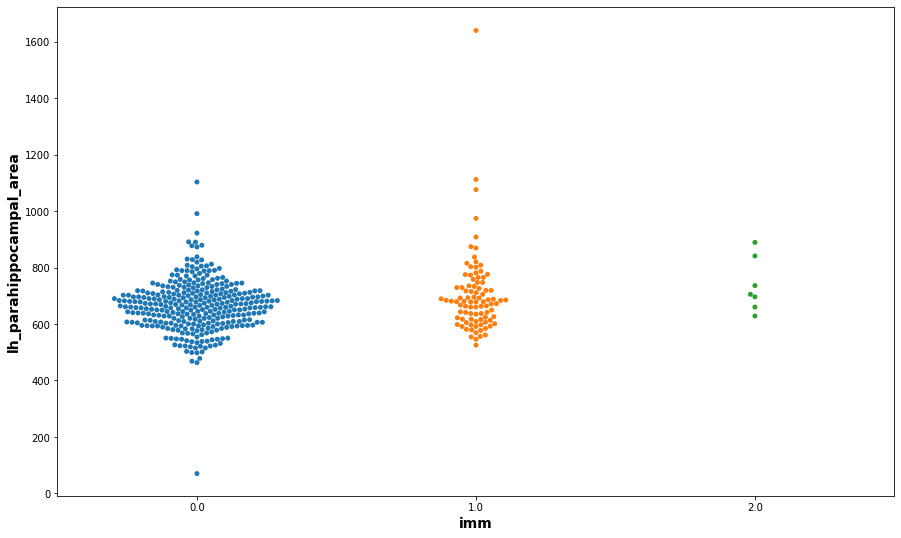

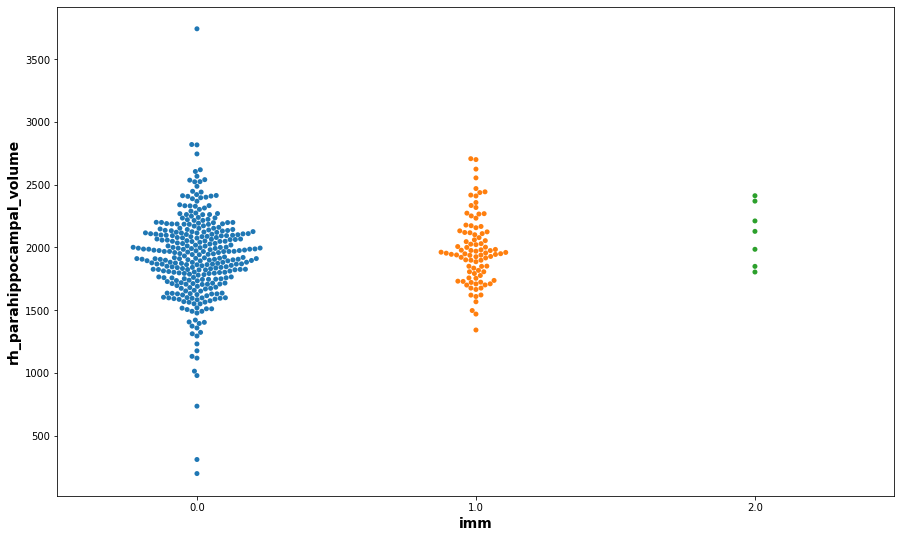

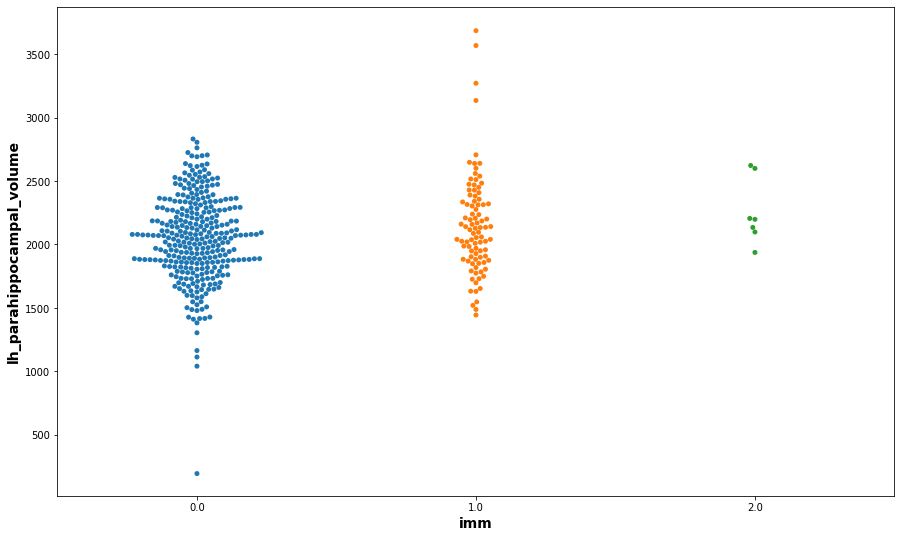

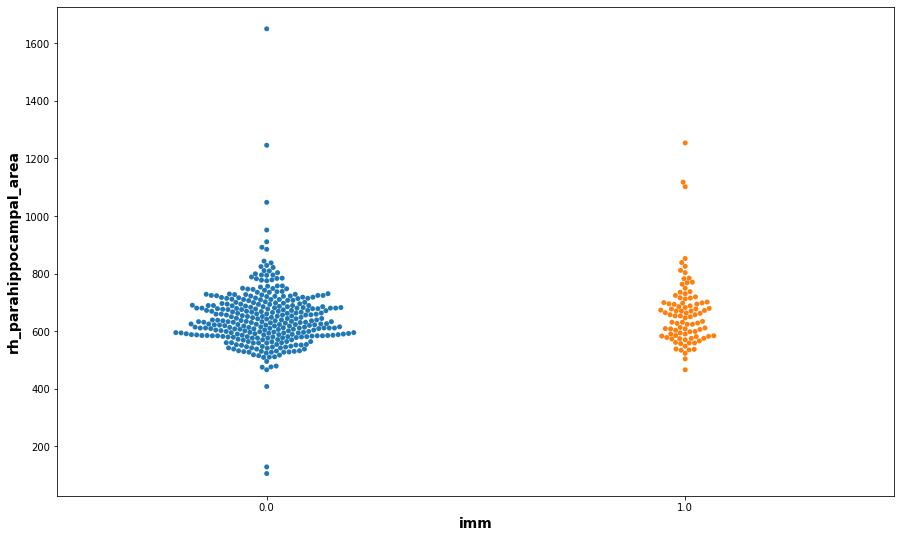

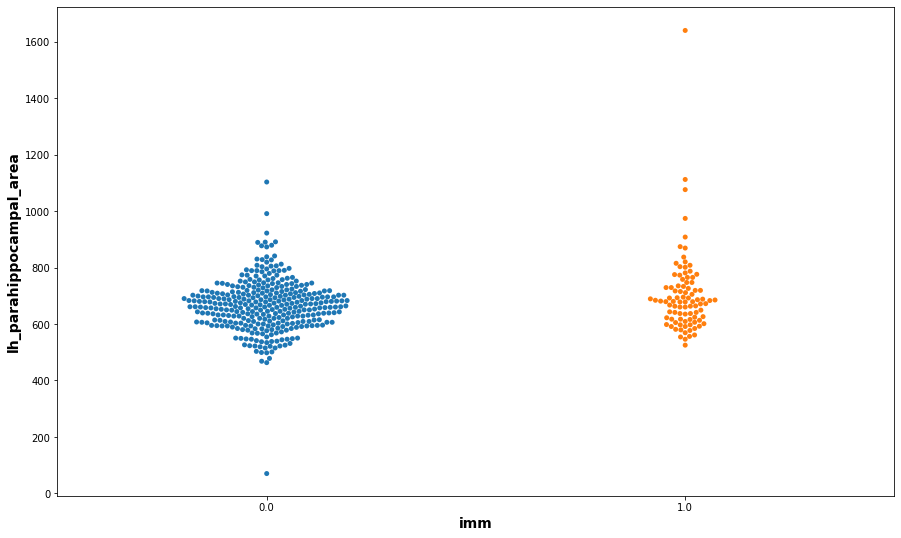

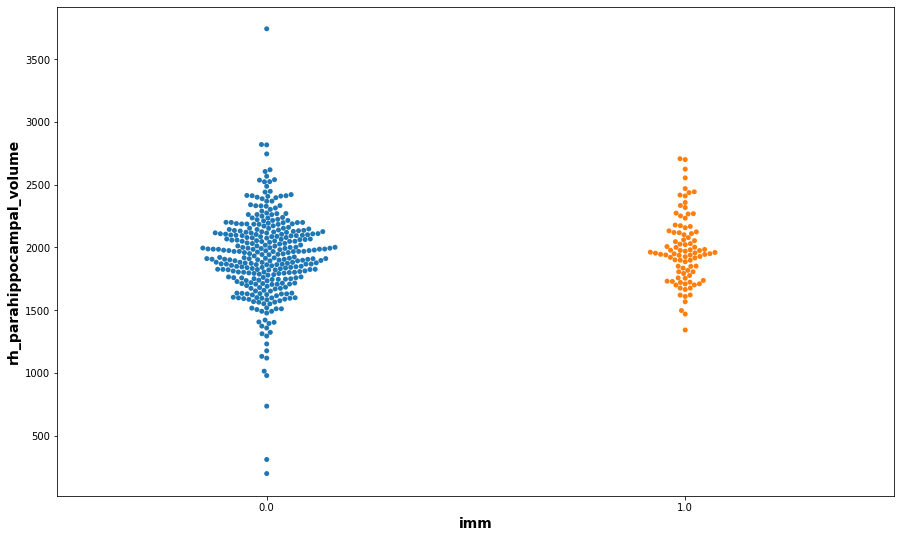

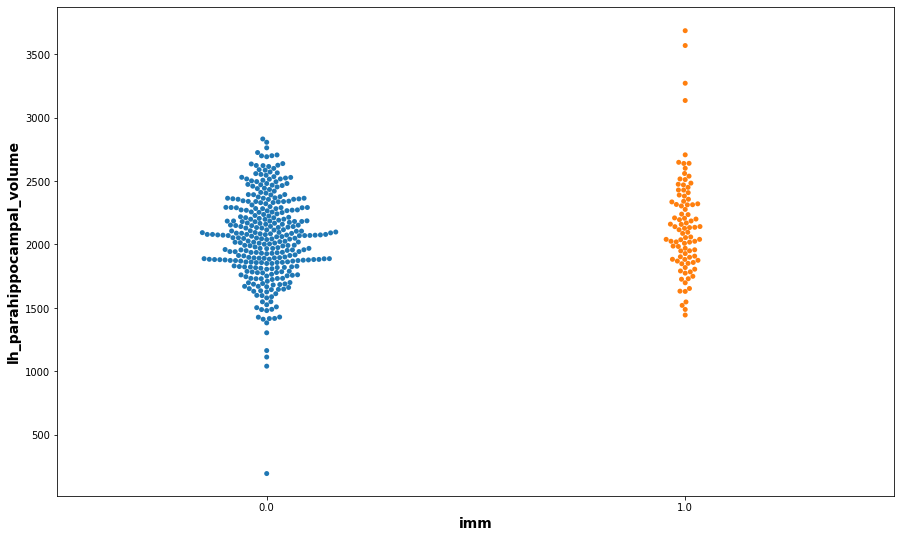

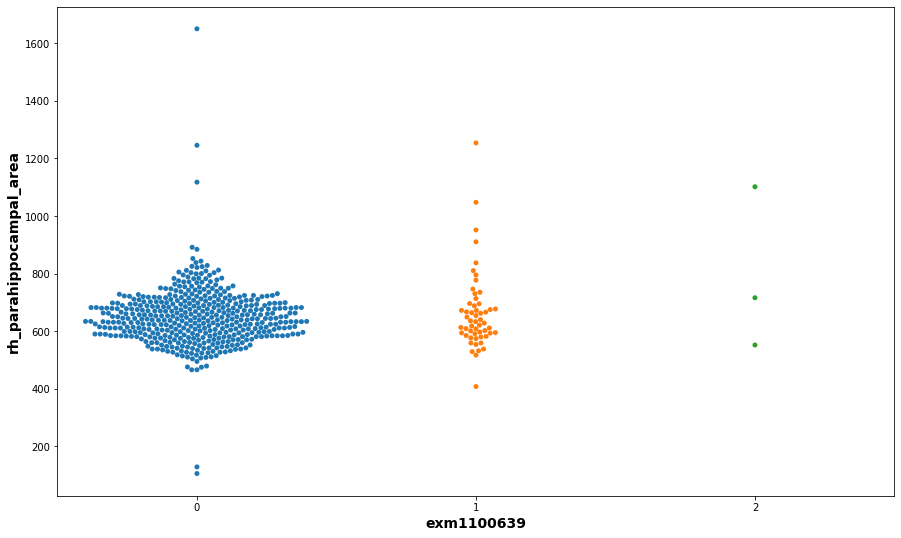

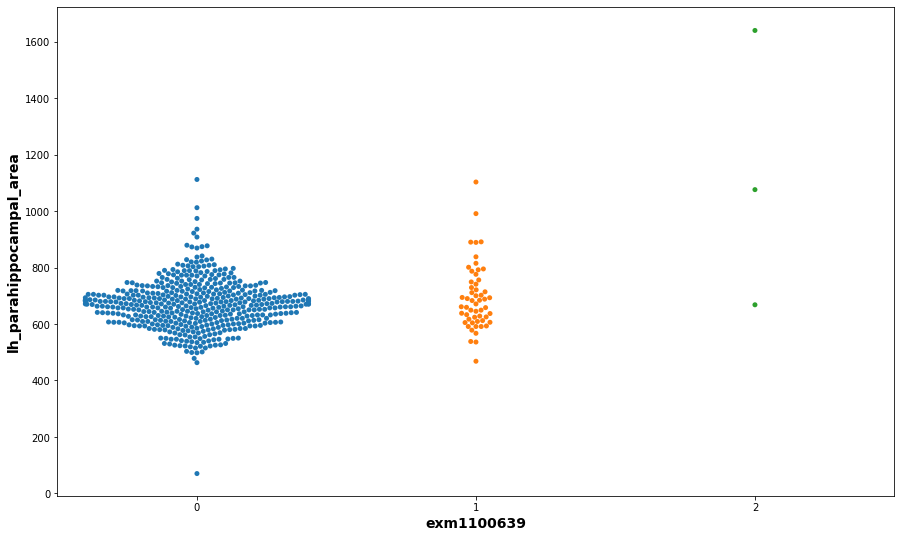

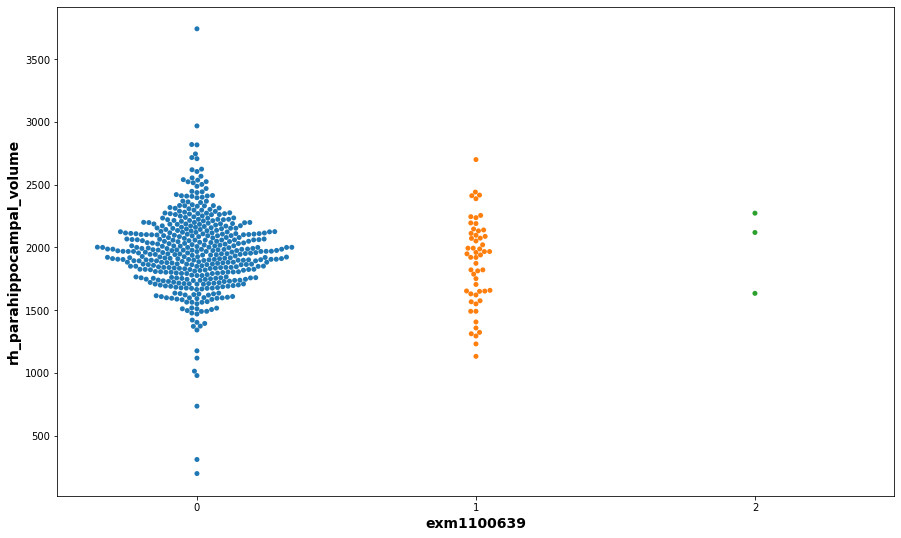

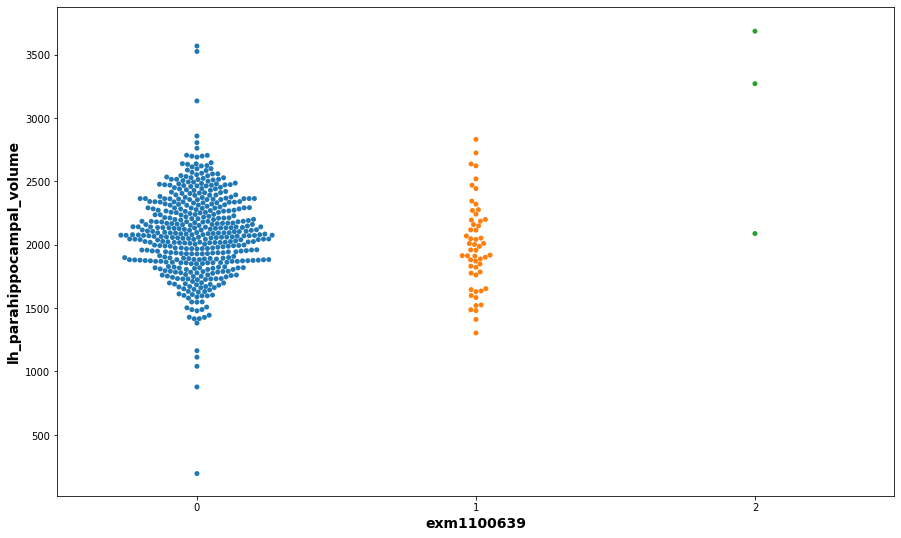

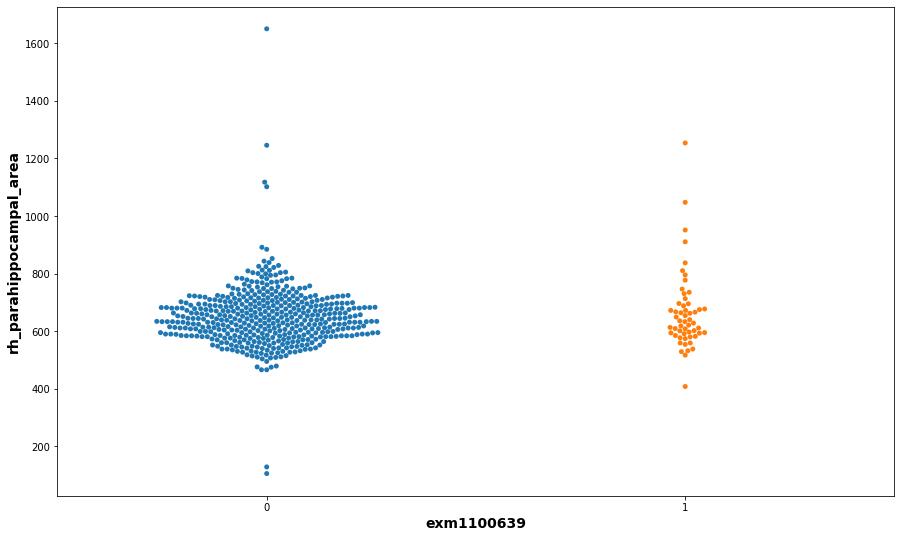

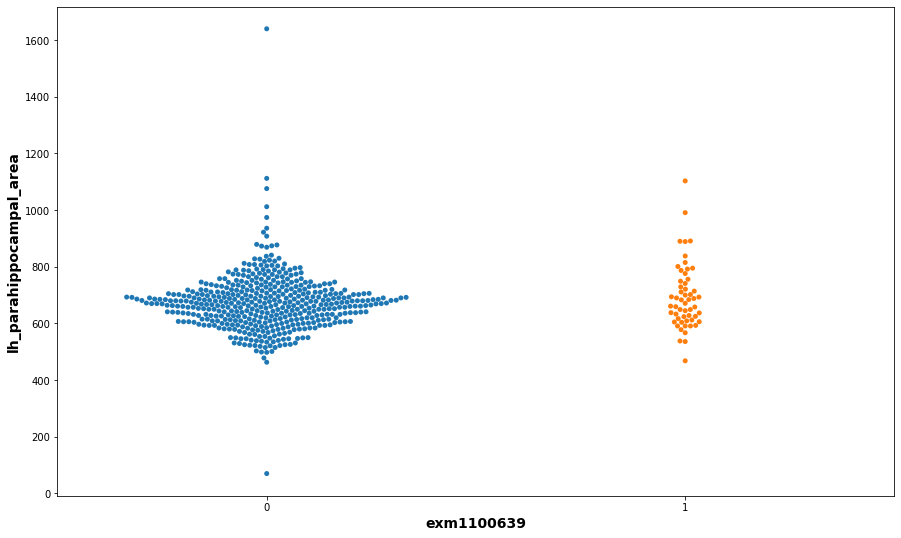

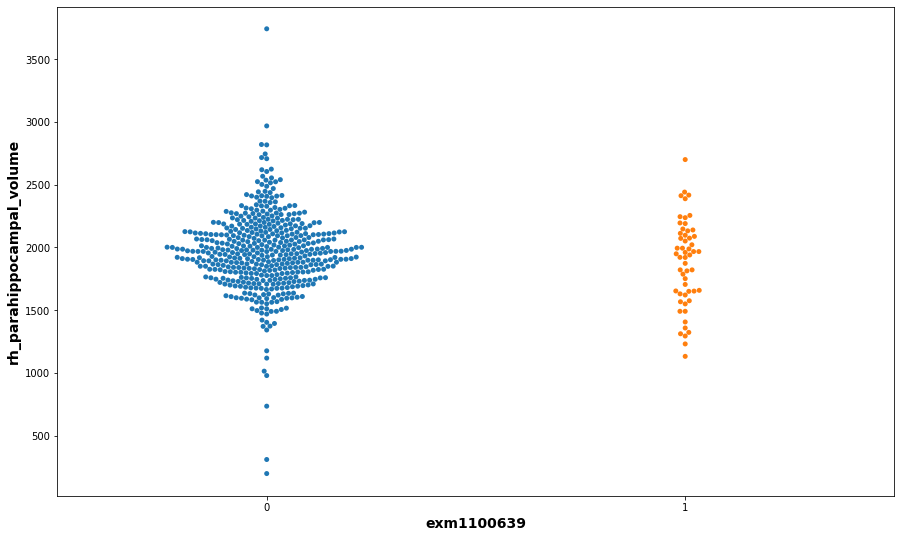

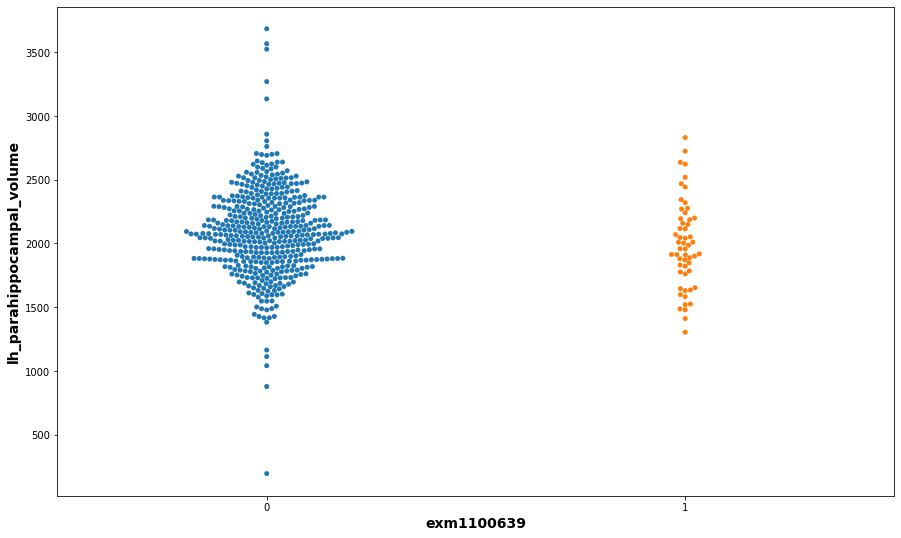

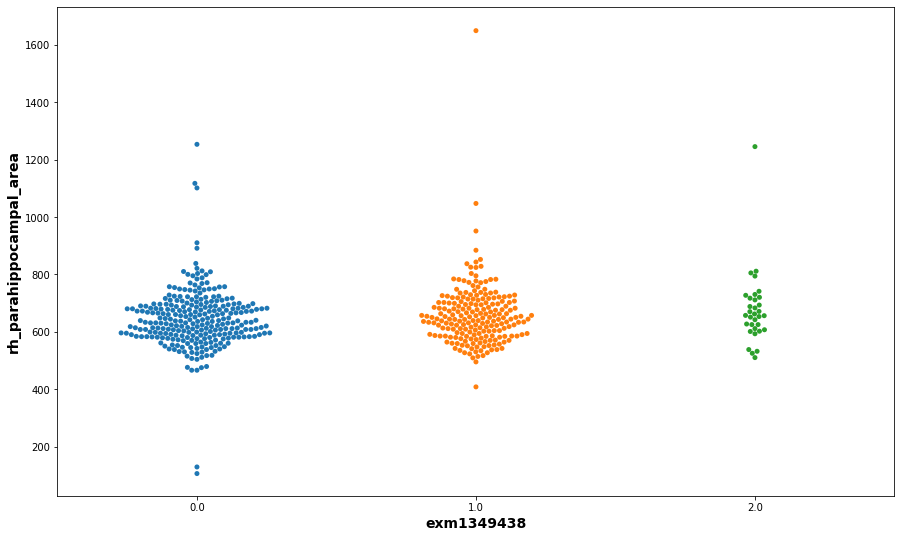

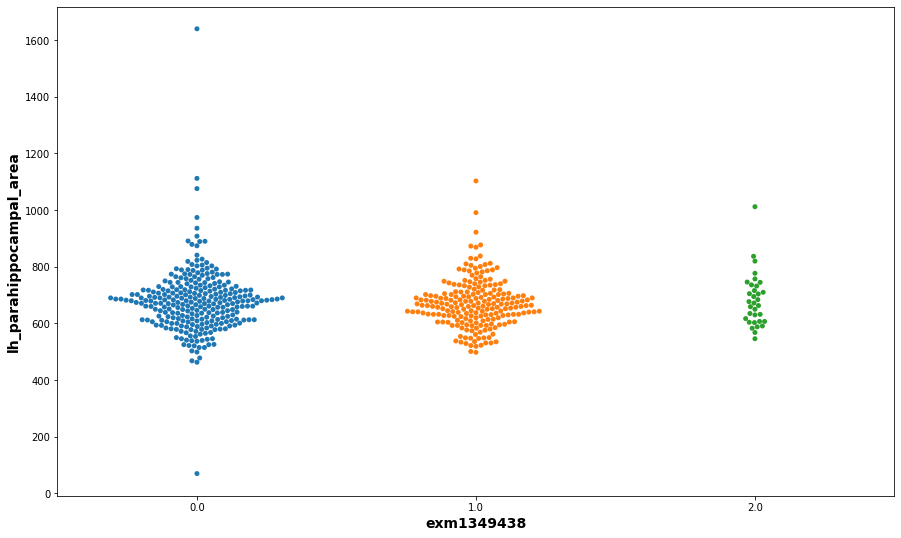

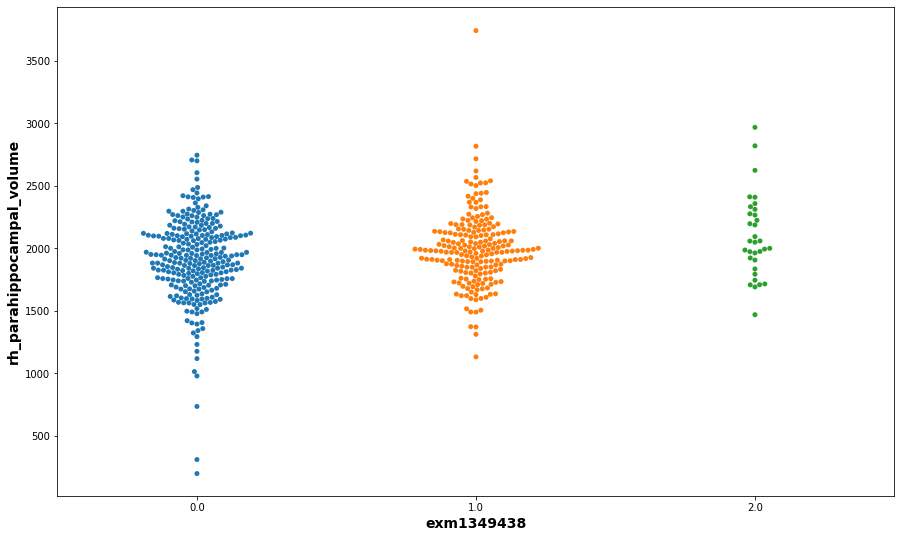

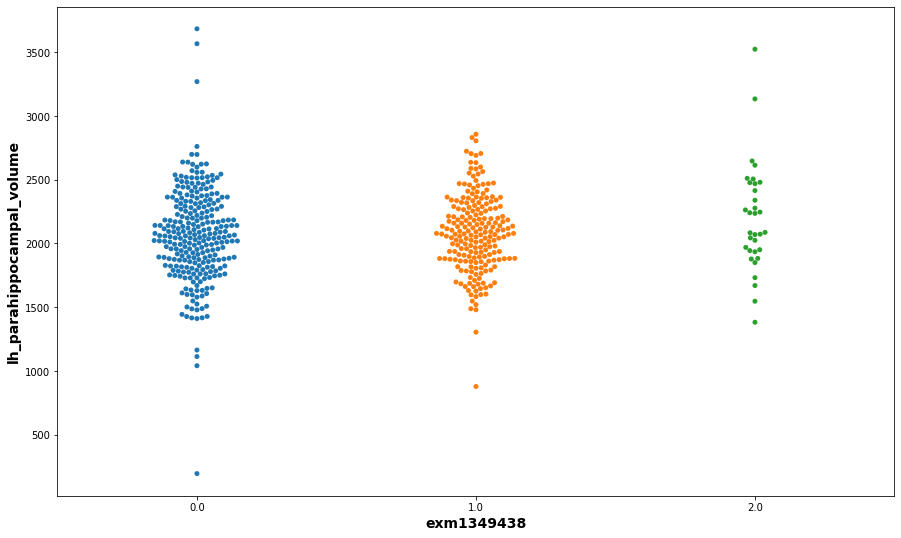

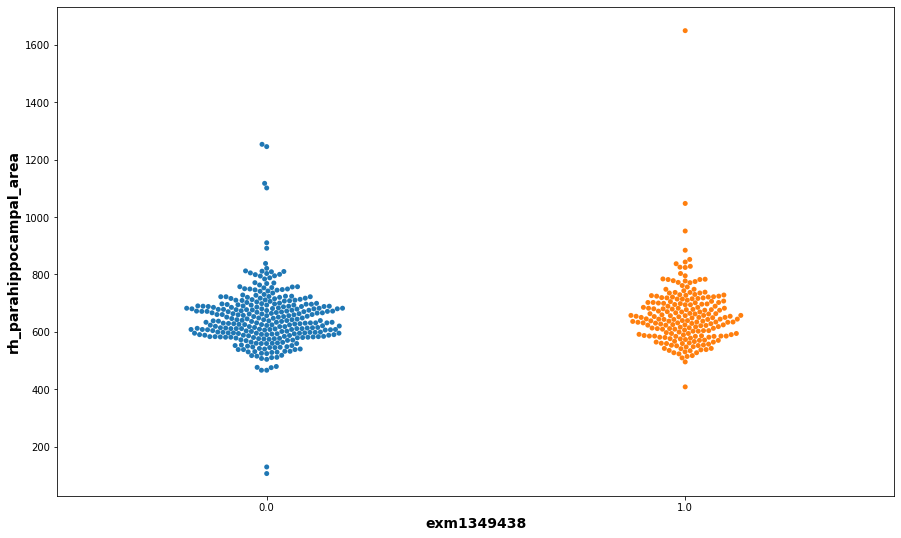

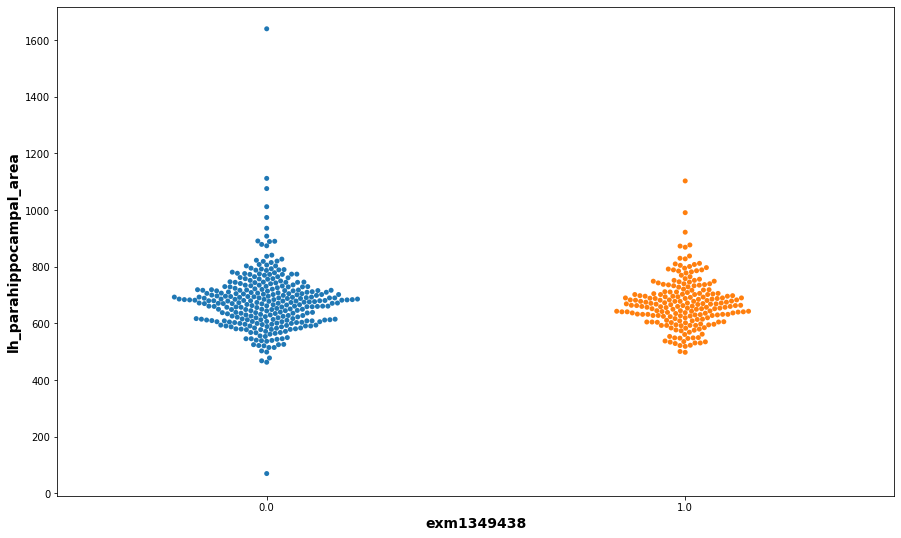

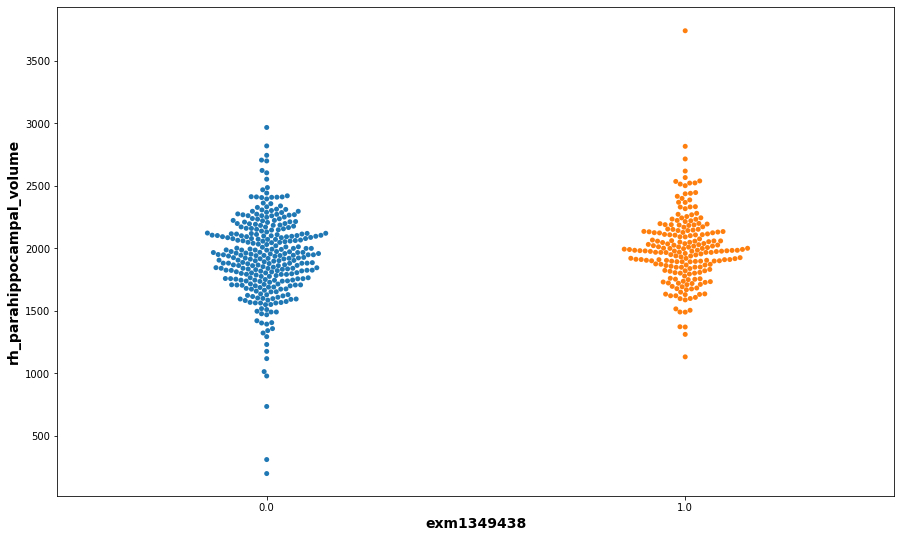

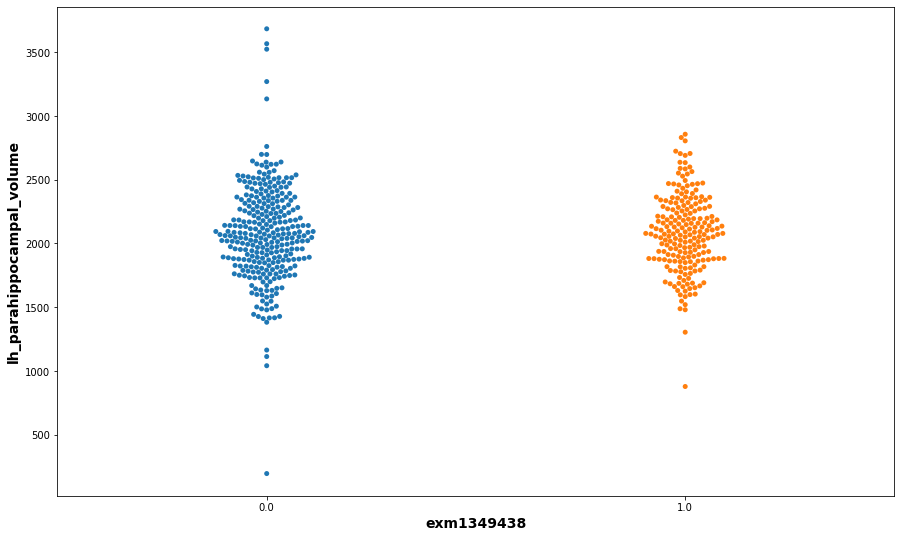

In [107]:
for i in snps2:
    name = i.split(sep, 1)[0]
    for j in phenotype2:
        plt.figure(figsize=(15,9))
        sns.swarmplot(x=i, y=j, data=info_mri)
        plt.xlabel(name,fontweight="bold",fontsize=14)
        plt.ylabel(j,fontweight="bold",fontsize=14)
        plt.savefig("Data/CHR_Filtered/Beeswarm plot/MRI/"+name+"_"+j+".png", bbox_inches='tight', dpi=600)